# Visualization

This is a very poorly formatted notebook purely meant for itterative testing to create visualizations to import into GIMP for actual data presentation. Here data is just loaded from the already clean source. 

There isn't anything useful other than see my process for how I created some of the charts seen in the final images. 

Excuse any dyslexia. 

***



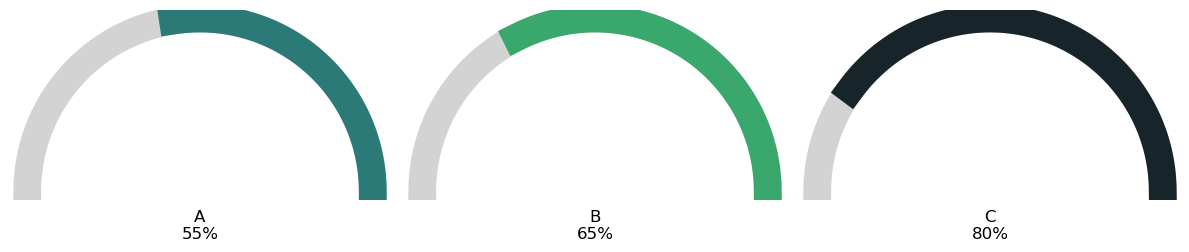

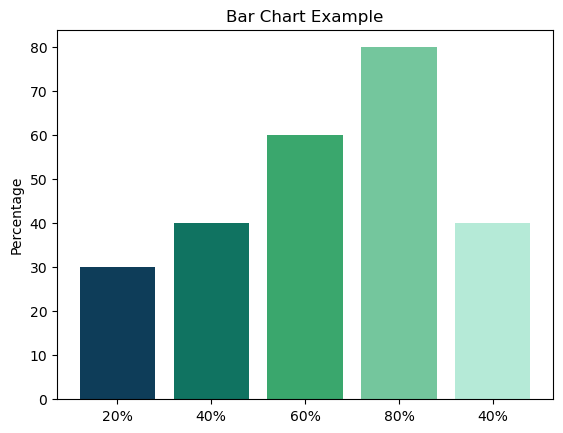

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def semi_circle_progress(ax, percent, color, label, offset=0):
    theta = np.linspace(0, np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='lightgrey', lw=20)
    
    progress_theta = np.linspace(0, np.pi * (percent / 100), 100)
    ax.plot(np.cos(progress_theta), np.sin(progress_theta), color=color, lw=20)
    
    ax.text(0, -0.2, f"{label}\n{percent}%", ha='center', va='center', fontsize=12)
    ax.axis('off')
    ax.set_aspect('equal')

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
semi_circle_progress(axs[0], 55, '#2b7a78', 'A')
semi_circle_progress(axs[1], 65, '#3aa76d', 'B')
semi_circle_progress(axs[2], 80, '#17252a', 'C')
plt.tight_layout()
plt.show()


values = [30, 40, 60, 80, 40]
labels = ['20%', '40%', '60%', '80%', '40%']
colors = ['#0e3d59', '#107361', '#3aa76d', '#74c69d', '#b5ead7']

plt.bar(range(len(values)), values, color=colors)
plt.xticks(range(len(values)), labels)
plt.ylabel("Percentage")
plt.title("Bar Chart Example")
plt.show()


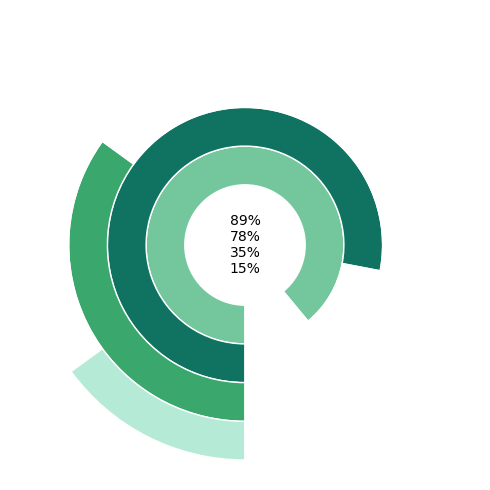

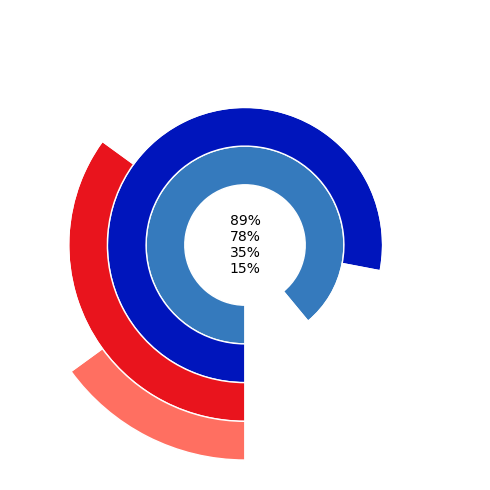

In [12]:
def stacked_ring_pie(ax, percents, colors, startangle=270):
    # Sort percents and colors so the largest percent is innermost
    sorted_data = sorted(zip(percents, colors), reverse=True)
    width = 0.18
    n = len(sorted_data)
    for i, (percent, color) in enumerate(sorted_data):
        sizes = [percent, 100 - percent]
        # Innermost ring has largest percent (i=0), so smallest radius
        ax.pie(
            sizes,
            radius=1 - (n - 1 - i) * width,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
    ax.text(0, 0, "\n".join([f"{p}%" for p, _ in sorted_data]), ha='center', va='center', fontsize=10)
    ax.axis('equal')

fig, ax = plt.subplots(figsize=(5, 5))
stacked_ring_pie(ax, [78, 35, 89, 15], ['#107361', '#3aa76d', '#74c69d', '#b5ead7'])
plt.tight_layout()
plt.show()

# Update the color palette to represent Democrats (blue) and Republicans (red)
dem_rep_colors = ['#0015BC', '#E9141D', '#357ABD', '#FF6F61']  # blue and red tones

fig, ax = plt.subplots(figsize=(5, 5))
stacked_ring_pie(ax, [78, 35, 89, 15], dem_rep_colors)
plt.tight_layout()
plt.show()



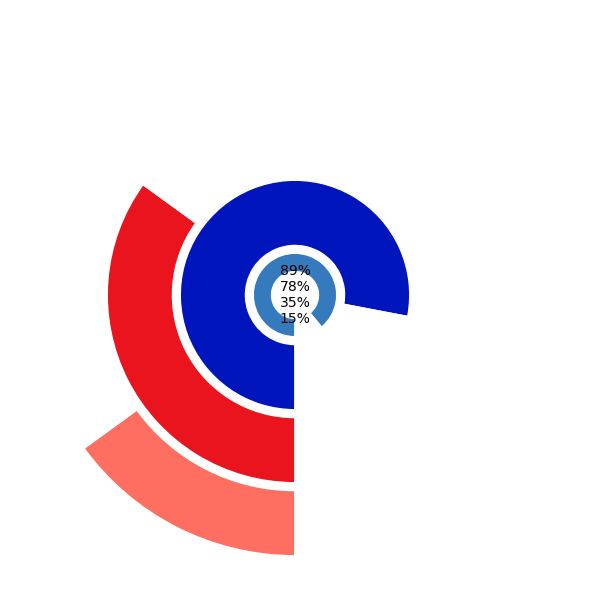

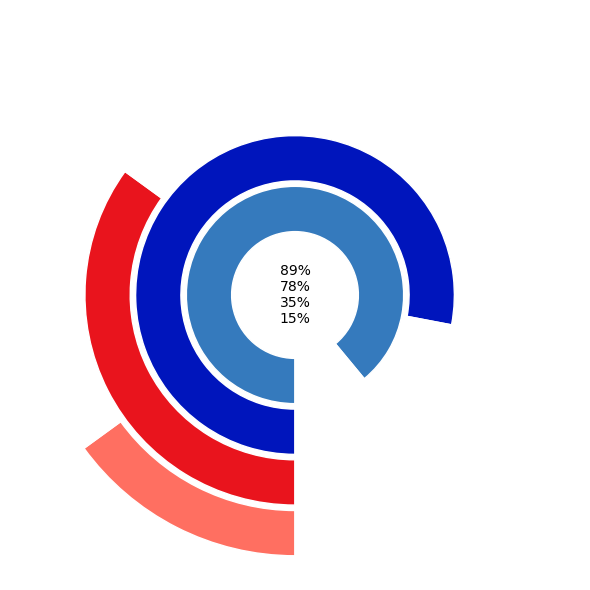

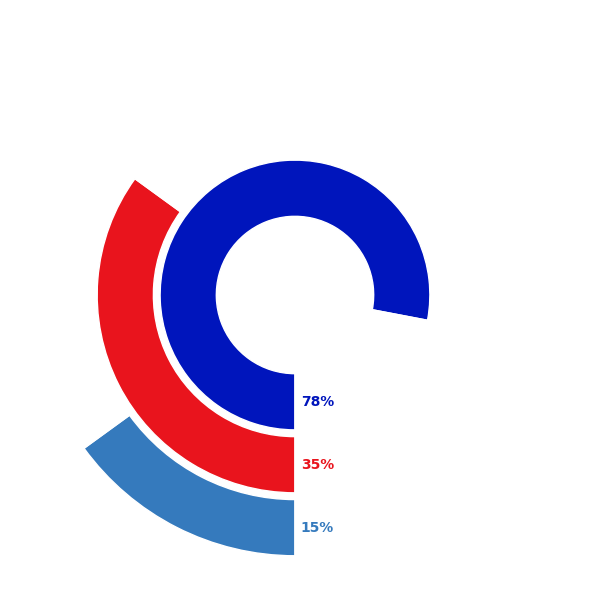

In [136]:
# Increase the ring width and add spacing between rings
def stacked_ring_pie_spaced(ax, percents, colors, startangle=270, width=0.25, gap=0.03):
    sorted_data = sorted(zip(percents, colors), reverse=True)
    n = len(sorted_data)
    for i, (percent, color) in enumerate(sorted_data):
        sizes = [percent, 100 - percent]
        # Calculate radius with gap between rings
        radius = 1 - (n - 1 - i) * (width + gap)
        ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
    ax.text(0, 0, "\n".join([f"{p}%" for p, _ in sorted_data]), ha='center', va='center', fontsize=10)
    ax.axis('equal')

fig, ax = plt.subplots(figsize=(6, 6))
stacked_ring_pie_spaced(ax, [78, 35, 89, 15], dem_rep_colors)
plt.tight_layout()
plt.show()

# Increase the size of the inner radius by adjusting the base radius
def stacked_ring_pie_spaced_inner(ax, percents, colors, startangle=270, width=0.25, gap=0.03, inner_radius=0.4):
    sorted_data = sorted(zip(percents, colors), reverse=True)
    n = len(sorted_data)
    for i, (percent, color) in enumerate(sorted_data):
        sizes = [percent, 100 - percent]
        # Start from inner_radius instead of 0
        radius = inner_radius + (i * (width + gap))
        ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
    ax.text(0, 0, "\n".join([f"{p}%" for p, _ in sorted_data]), ha='center', va='center', fontsize=10)
    ax.axis('equal')

fig, ax = plt.subplots(figsize=(6, 6))
stacked_ring_pie_spaced_inner(ax, [78, 35, 89, 15], dem_rep_colors, inner_radius=0.6)
plt.tight_layout()
plt.show()

# Place the text by the starting point of each ring
def stacked_ring_pie_spaced_labels(ax, percents, colors, startangle=270, width=0.25, gap=0.03, inner_radius=0.4):
    sorted_data = sorted(zip(percents, colors), reverse=True)
    n = len(sorted_data)
    for i, (percent, color) in enumerate(sorted_data):
        sizes = [percent, 100 - percent]
        radius = inner_radius + (i * (width + gap))
        wedges, _ = ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
        # Calculate the position for the label at the start of the colored wedge
        theta_rad = np.deg2rad(startangle)
        x = (radius - width / 2) * np.cos(theta_rad) + 0.1  # Offset to avoid overlap with the ring
        y = (radius - width / 2) * np.sin(theta_rad)
        ax.text(x, y, f"{percent}%", ha='center', va='center', fontsize=10, color=color, fontweight='bold')
    ax.axis('equal')

fig, ax = plt.subplots(figsize=(6, 6))
stacked_ring_pie_spaced_labels(ax, [78, 35, 15], dem_rep_colors, inner_radius=0.6)
plt.tight_layout()
plt.show()

# Helper to return sorted percents and colors in the same order

def sort_percents_colors(percents, colors):
    sorted_indices = sorted(range(len(percents)), key=lambda i: percents[i], reverse=True)
    sorted_percents = [percents[i] for i in sorted_indices]
    sorted_colors = [colors[i] for i in sorted_indices]
    return sorted_percents, sorted_colors

# Modified piechart functions to keep colors consistent with percents

def stacked_ring_pie_spaced(ax, percents, colors, startangle=270, width=0.25, gap=0.03):
    sorted_percents, sorted_colors = sort_percents_colors(percents, colors)
    n = len(sorted_percents)
    for i, (percent, color) in enumerate(zip(sorted_percents, sorted_colors)):
        sizes = [percent, 100 - percent]
        radius = 1 - (n - 1 - i) * (width + gap)
        ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
    ax.text(0, 0, "\n".join([f"{p}%" for p in sorted_percents]), ha='center', va='center', fontsize=10)
    ax.axis('equal')

def stacked_ring_pie_spaced_inner(ax, percents, colors, startangle=270, width=0.25, gap=0.03, inner_radius=0.4):
    sorted_percents, sorted_colors = sort_percents_colors(percents, colors)
    n = len(sorted_percents)
    for i, (percent, color) in enumerate(zip(sorted_percents, sorted_colors)):
        sizes = [percent, 100 - percent]
        radius = inner_radius + (i * (width + gap))
        ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, '#ffffff'],
            wedgeprops=dict(width=width, edgecolor='white'),
            counterclock=False
        )
    ax.text(0, 0, "\n".join([f"{p}%" for p in sorted_percents]), ha='center', va='center', fontsize=10)
    ax.axis('equal')

def stacked_ring_pie_spaced_labels(ax, percents, colors, startangle=270, width=0.25, gap=0.03, inner_radius=0.4):
    sorted_percents, sorted_colors = sort_percents_colors(percents, colors)
    n = len(sorted_percents)
    for i, (percent, color) in enumerate(zip(sorted_percents, sorted_colors)):
        sizes = [percent, 100 - percent]
        radius = inner_radius + (i * (width + gap))
        wedges, _ = ax.pie(
            sizes,
            radius=radius,
            startangle=startangle,
            colors=[color, 'none'],
            wedgeprops=dict(width=width, edgecolor='none'),
            counterclock=False
        )
        theta_rad = np.deg2rad(startangle)
        x = (radius - width / 2) * np.cos(theta_rad) + 0.1
        y = (radius - width / 2) * np.sin(theta_rad)
        ax.text(x, y, f"{percent}%", ha='center', va='center', fontsize=10, color=color, fontweight='bold')
    ax.axis('equal')



In [31]:
import pandas as pd

r_conservative = pd.read_csv('r_conservative_comments_stance.csv')
r_democrats = pd.read_csv('r_democrats_comments_stance.csv')
r_politics = pd.read_csv('r_politics_comments_stance.csv')
r_libertarian = pd.read_csv('r_libertarian_comments_stance.csv')

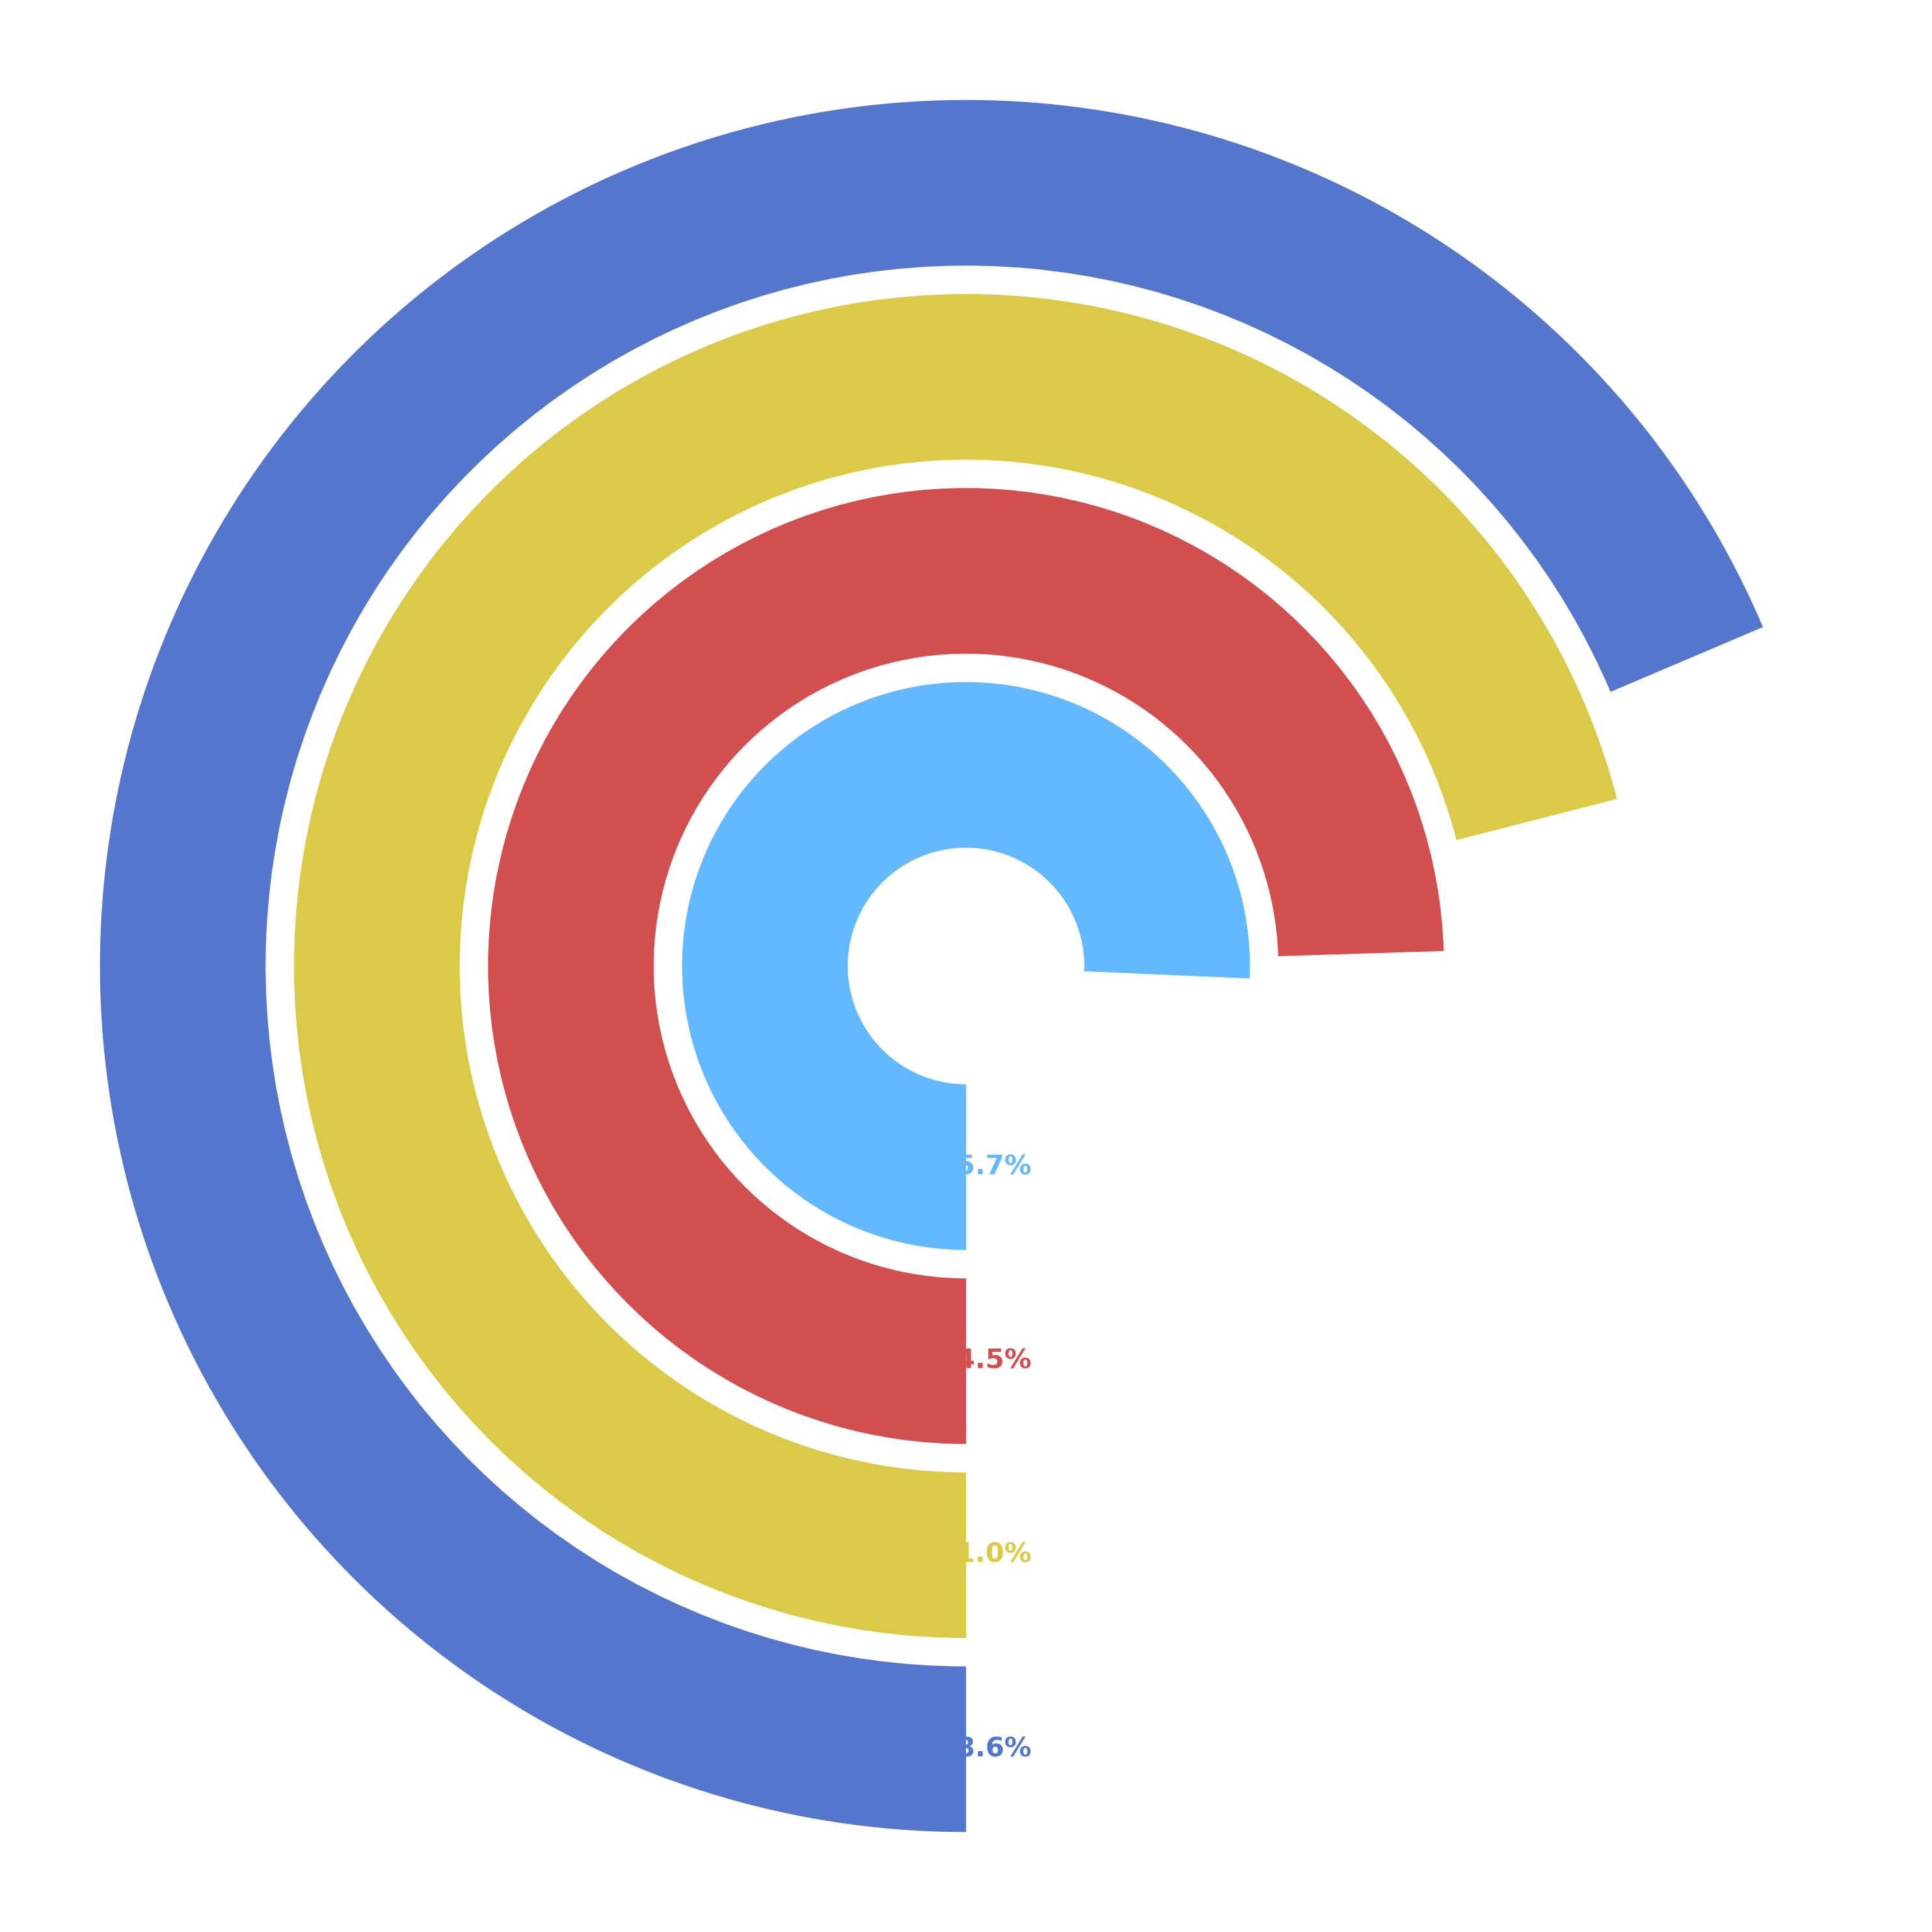

Oppose percentages: [74.5, 68.6, 71.0, 75.7]


In [149]:
# Calculate % of 'Oppose' stance for each dataframe
def oppose_percent(df):
    total = len(df)
    oppose = (df['stance'] == 'Oppose').sum()
    return round(100 * oppose / total, 1) if total > 0 else 0

percents = [
    oppose_percent(r_conservative),
    oppose_percent(r_democrats),
    oppose_percent(r_libertarian),
    oppose_percent(r_politics)
]
# Attach colors to each subreddit: Conservative (red), Democrats (blue), Politics (light blue)
# Pastel minimalistic color palette: Conservative (pastel red), Democrat (pastel blue), Libertarian (pastel yellow), Politics (pastel gray)
minimal_colors = ["#D24F4F", "#5476CD", "#DBCA48", "#63B9FF"]
# Use the most recent piechart function: stacked_ring_pie_spaced_labels
fig, ax = plt.subplots(figsize=(10, 10 ), facecolor='none', dpi=300)
ax.set_facecolor('none')  # Set the background to transparent
stacked_ring_pie_spaced_labels(ax, percents, minimal_colors, inner_radius=3/2, gap=0.3/2, width=1.75/2)
plt.tight_layout()
plt.show()
print("Oppose percentages:" , percents)

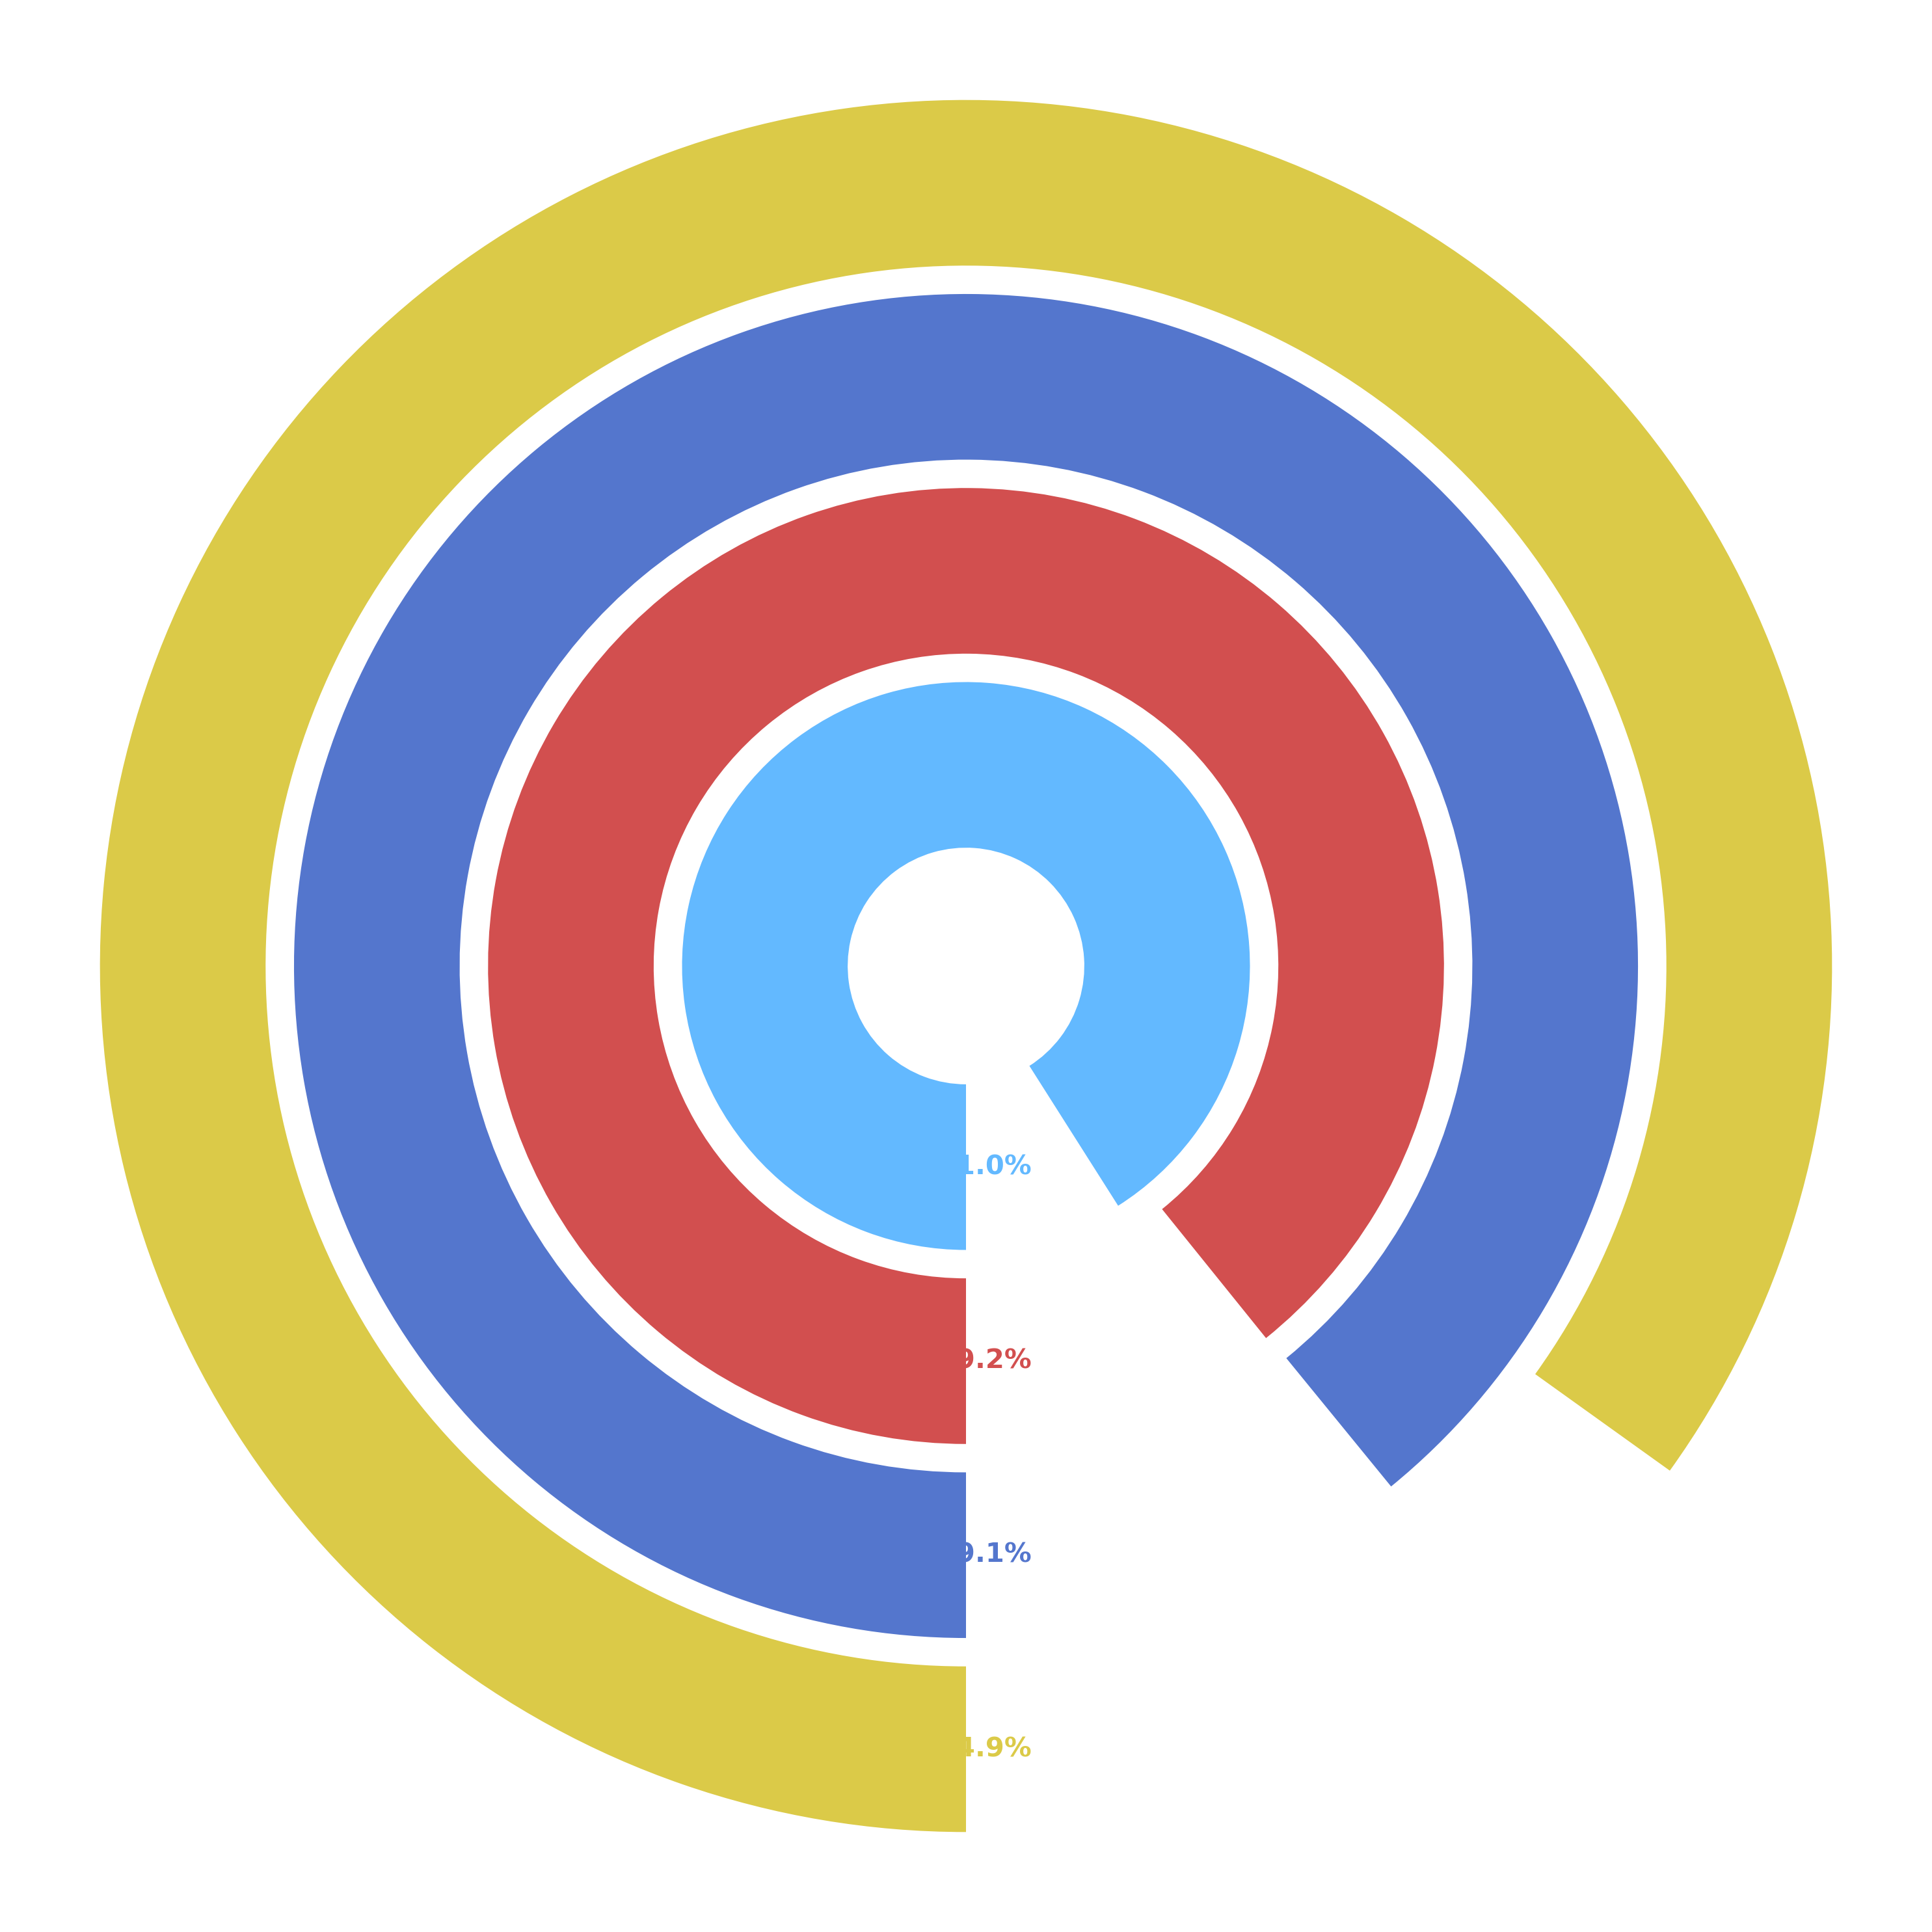

Oppose percentages (using 'stance'): [89.2, 89.1, 84.9, 91.0]


In [184]:
# Calculate % of 'Oppose' stance for each dataframe using 'stance' column
def oppose_percent_stance(df):
    total = len(df)
    oppose = (df['stance_topic'] == 'Oppose').sum()
    return round(100 * oppose / total, 1) if total > 0 else 0

percents_stance = [
    oppose_percent_stance(r_conservative),
    oppose_percent_stance(r_democrats),
    oppose_percent_stance(r_libertarian),
    oppose_percent_stance(r_politics)
]

fig, ax = plt.subplots(figsize=(10, 10), facecolor='none', dpi=300)
ax.set_facecolor('none')  # Set the background to transparent
stacked_ring_pie_spaced_labels(ax, percents_stance, minimal_colors,inner_radius=3/2, gap=0.3/2, width=1.75/2)
plt.tight_layout()
plt.show()
print("Oppose percentages (using 'stance'):", percents_stance)

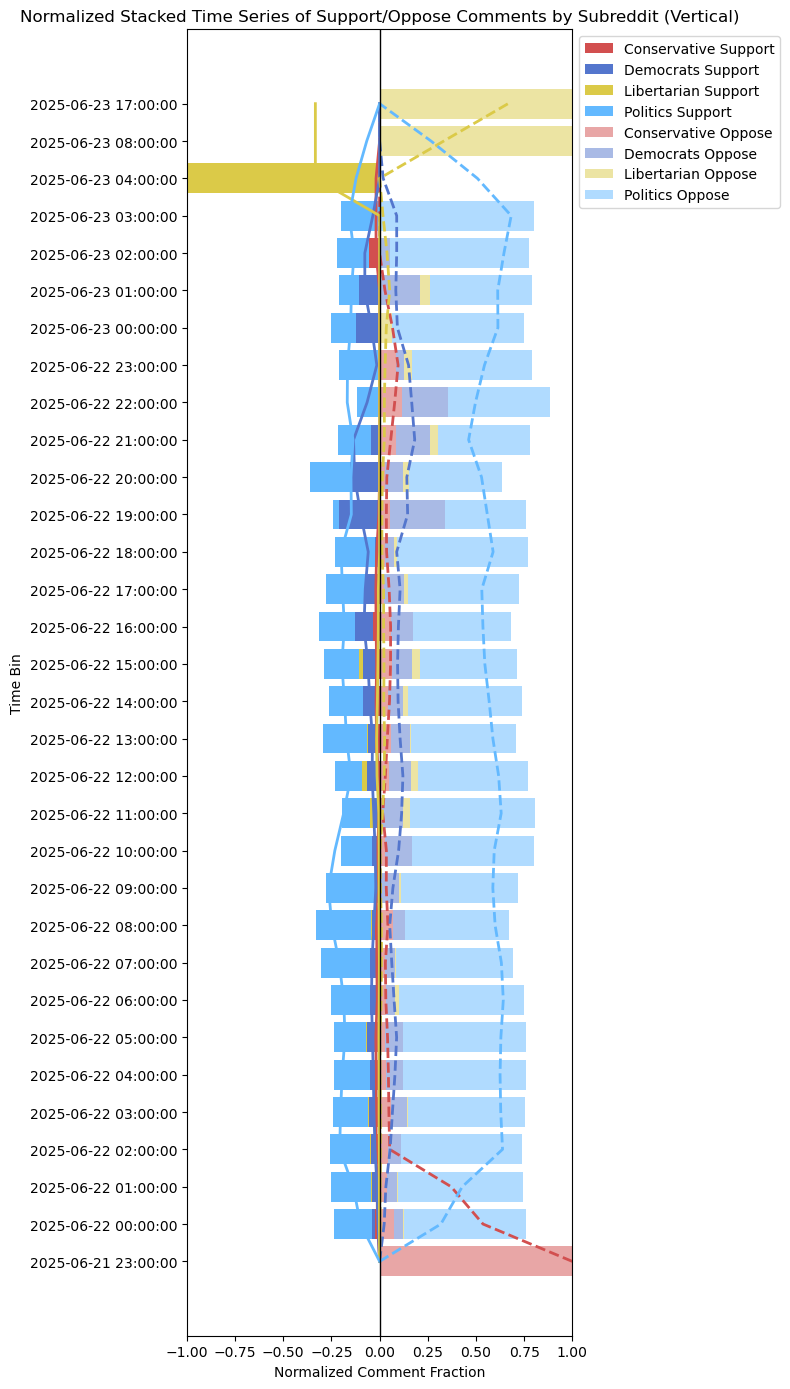

In [44]:
# Prepare time bins and counts for each dataframe and stance
def get_time_series_counts(df, stance_col='stance', time_col='time_bin'):
    # Group by time_bin and stance, count occurrences
    counts = df.groupby([time_col, stance_col]).size().unstack(fill_value=0)
    # Ensure both 'Support' and 'Oppose' columns exist
    for col in ['Support', 'Oppose']:
        if col not in counts.columns:
            counts[col] = 0
    counts = counts.sort_index()
    return counts

# Ensure all dataframes have a 'time_bin' column (hourly bins)
for df in [r_conservative, r_democrats, r_libertarian, r_politics]:
    if 'time_bin' not in df.columns:
        df['time_bin'] = pd.to_datetime(df['created_utc']).dt.floor('H').astype(str)

# Get time series counts for each subreddit
ts_con = get_time_series_counts(r_conservative)
ts_dem = get_time_series_counts(r_democrats)
ts_lib = get_time_series_counts(r_libertarian)
ts_pol = get_time_series_counts(r_politics)

# Align all time bins
all_time_bins = sorted(set(ts_con.index) | set(ts_dem.index) | set(ts_lib.index) | set(ts_pol.index))
ts_con = ts_con.reindex(all_time_bins, fill_value=0)
ts_dem = ts_dem.reindex(all_time_bins, fill_value=0)
ts_lib = ts_lib.reindex(all_time_bins, fill_value=0)
ts_pol = ts_pol.reindex(all_time_bins, fill_value=0)

# Stack all counts for plotting
support_counts = np.vstack([ts_con['Support'], ts_dem['Support'], ts_lib['Support'], ts_pol['Support']])
oppose_counts = np.vstack([ts_con['Oppose'], ts_dem['Oppose'], ts_lib['Oppose'], ts_pol['Oppose']])

# Colors for each subreddit
bar_colors = minimal_colors



# Normalize counts by total comments per time bin (across all subreddits)
total_counts = (
    ts_con.sum(axis=1) +
    ts_dem.sum(axis=1) +
    ts_lib.sum(axis=1) +
    ts_pol.sum(axis=1)
).replace(0, 1)  # avoid division by zero

# Prepare normalized support and oppose counts (shape: 4 x time_bins)
norm_support = np.vstack([
    ts_con['Support'] / total_counts,
    ts_dem['Support'] / total_counts,
    ts_lib['Support'] / total_counts,
    ts_pol['Support'] / total_counts
])
norm_oppose = np.vstack([
    ts_con['Oppose'] / total_counts,
    ts_dem['Oppose'] / total_counts,
    ts_lib['Oppose'] / total_counts,
    ts_pol['Oppose'] / total_counts
])

fig, ax = plt.subplots(figsize=(8, 14))

# Plot stacked bars for Support (bottom, left side)
left = np.zeros(len(all_time_bins))
for i, counts in enumerate(norm_support):
    ax.barh(all_time_bins, -counts, left=-left, color=bar_colors[i], height=0.8, label=f"{['Conservative','Democrats','Libertarian','Politics'][i]} Support")
    left += counts

# Plot stacked bars for Oppose (bottom, right side)
left = np.zeros(len(all_time_bins))
for i, counts in enumerate(norm_oppose):
    ax.barh(all_time_bins, counts, left=left, color=bar_colors[i], height=0.8, alpha=0.5, label=f"{['Conservative','Democrats','Libertarian','Politics'][i]} Oppose")
    left += counts

# Plot moving averages as lines (normalized)
for i, (ts, color) in enumerate(zip([ts_con, ts_dem, ts_lib, ts_pol], bar_colors)):
    ma_support = (ts['Support'] / total_counts).rolling(window, min_periods=1).mean()
    ma_oppose = (ts['Oppose'] / total_counts).rolling(window, min_periods=1).mean()
    ax.plot(-ma_support, all_time_bins, color=color, linestyle='-', linewidth=2)
    ax.plot(ma_oppose, all_time_bins, color=color, linestyle='--', linewidth=2)

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction")
ax.set_ylabel("Time Bin")
ax.set_title("Normalized Stacked Time Series of Support/Oppose Comments by Subreddit (Vertical)")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

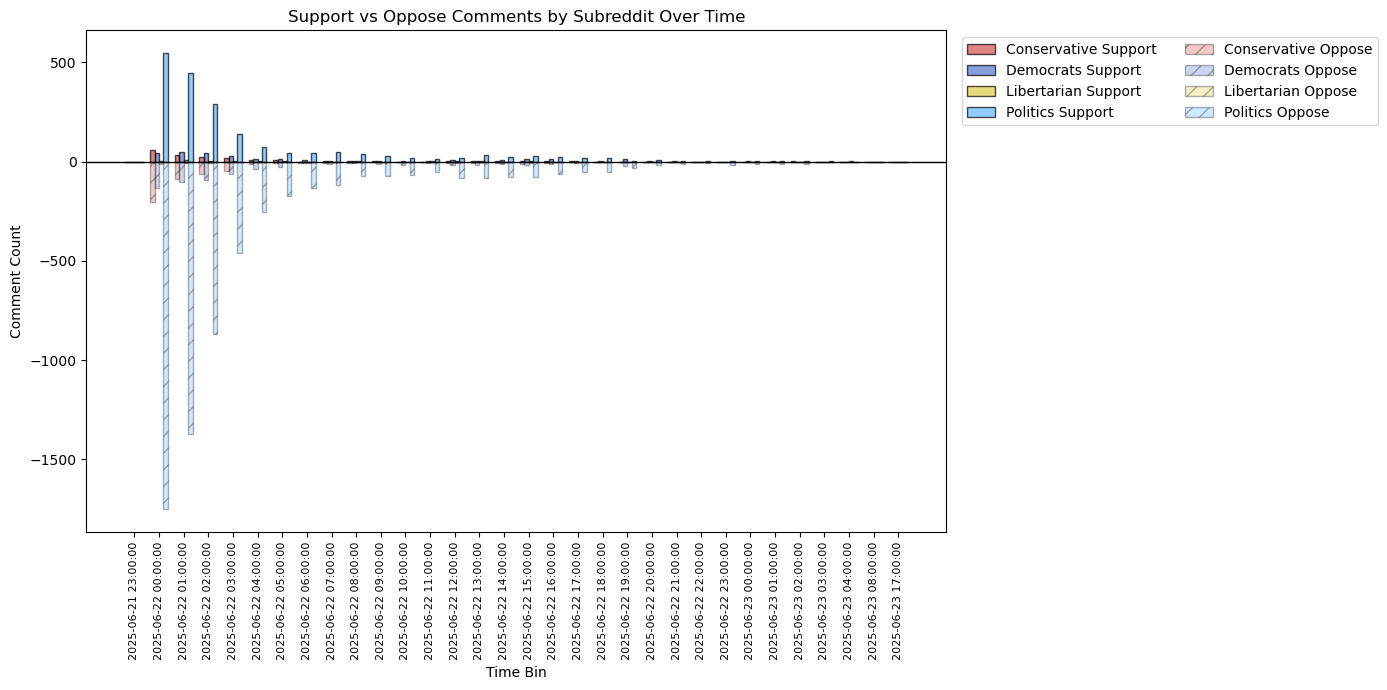

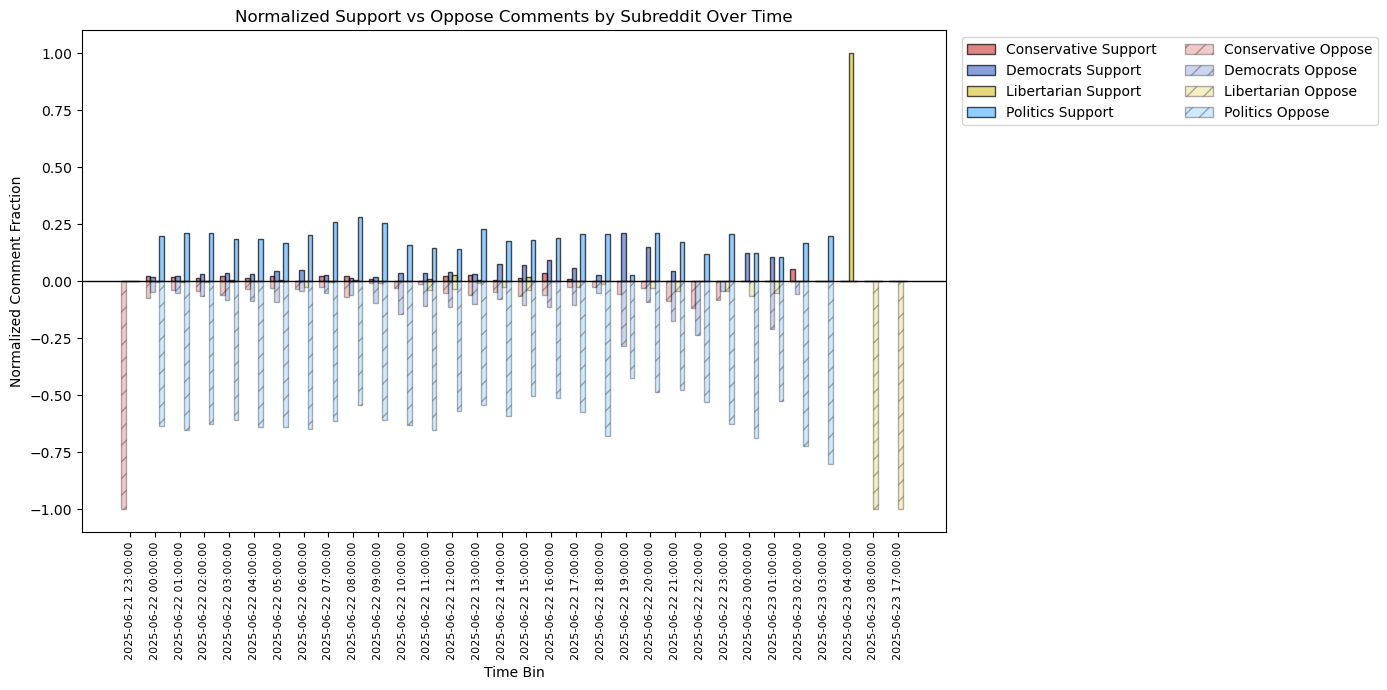

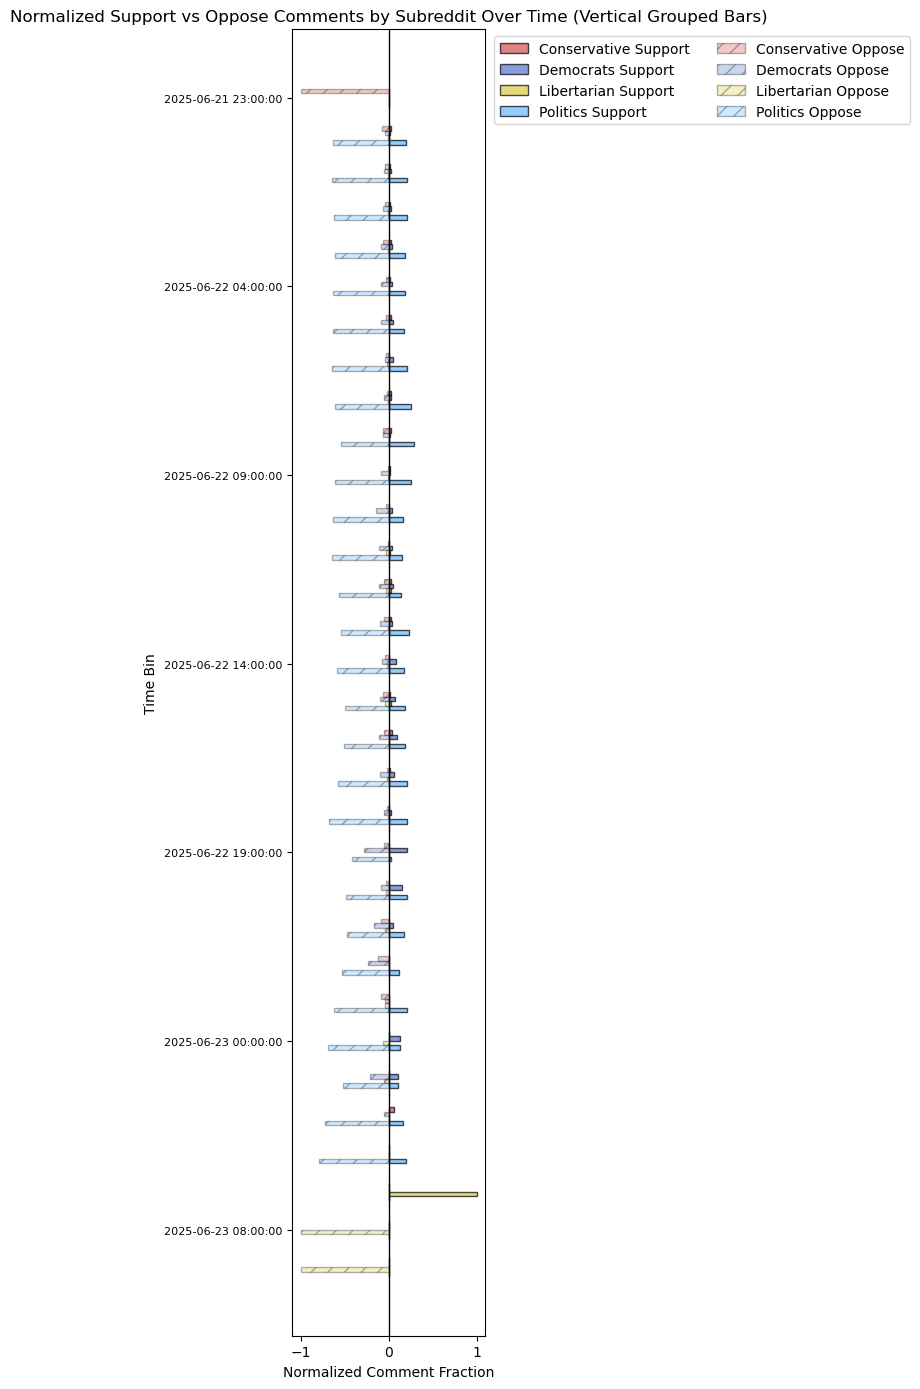

In [49]:
import numpy as np

# Improved readability: Use a grouped bar chart with clear labels and legend

import matplotlib.pyplot as plt

# Prepare data for grouped bar chart
time_labels = list(ts.index)
x = np.arange(len(time_labels))
width = 0.18

fig, ax = plt.subplots(figsize=(14, 7))

# Plot Support bars
for idx, (counts, label, color) in enumerate(zip(support_counts, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.bar(x + idx*width - 1.5*width, counts, width, label=f"{label} Support", color=color, alpha=0.7, edgecolor='black')

# Plot Oppose bars (negative for visual separation)
for idx, (counts, label, color) in enumerate(zip(oppose_counts, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.bar(x + idx*width - 1.5*width, -counts, width, label=f"{label} Oppose", color=color, alpha=0.3, edgecolor='black', hatch='//')

# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Improve x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_labels, rotation=90, fontsize=8)
ax.set_ylabel("Comment Count")
ax.set_xlabel("Time Bin")
ax.set_title("Support vs Oppose Comments by Subreddit Over Time")
ax.legend(ncol=2, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Normalize support and oppose counts by total_counts for each time bin
support_norm = support_counts / total_counts.values
oppose_norm = oppose_counts / total_counts.values

fig, ax = plt.subplots(figsize=(14, 7))

# Plot normalized Support bars
for idx, (counts, label, color) in enumerate(zip(support_norm, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.bar(x + idx*width - 1.5*width, counts, width, label=f"{label} Support", color=color, alpha=0.7, edgecolor='black')

# Plot normalized Oppose bars (negative for visual separation)
for idx, (counts, label, color) in enumerate(zip(oppose_norm, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.bar(x + idx*width - 1.5*width, -counts, width, label=f"{label} Oppose", color=color, alpha=0.3, edgecolor='black', hatch='//')

ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(x)
ax.set_xticklabels(time_labels, rotation=90, fontsize=8)
ax.set_ylabel("Normalized Comment Fraction")
ax.set_xlabel("Time Bin")
ax.set_title("Normalized Support vs Oppose Comments by Subreddit Over Time")
ax.legend(ncol=2, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Make bars closer together and plot as a vertical grouped bar chart (bars go horizontally, time on y-axis)
# Normalize support and oppose counts by total_counts for each time bin
width = 0.12  # narrower bars
fig, ax = plt.subplots(figsize=(8, 14))  # taller than wide for vertical look

# Plot normalized Support bars (horizontal, grouped by time bin)
for idx, (counts, label, color) in enumerate(zip(support_norm, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.barh(x + idx*width - 1.5*width, counts, height=width, label=f"{label} Support", color=color, alpha=0.7, edgecolor='black')

# Plot normalized Oppose bars (horizontal, negative for visual separation)
for idx, (counts, label, color) in enumerate(zip(norm_oppose, ['Conservative', 'Democrats', 'Libertarian', 'Politics'], minimal_colors)):
    ax.barh(x + idx*width - 1.5*width, -counts, height=width, label=f"{label} Oppose", color=color, alpha=0.3, edgecolor='black', hatch='//')

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction")
ax.set_ylabel("Time Bin")
ax.set_title("Normalized Support vs Oppose Comments by Subreddit Over Time (Vertical Grouped Bars)")

# Show yticklabels only every 5
yticks = np.arange(0, len(time_labels), 5)
ax.set_yticks(yticks)
ax.set_yticklabels([time_labels[i] for i in yticks], fontsize=8)

# Flip y-axis
ax.invert_yaxis()
ax.legend(ncol=2, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

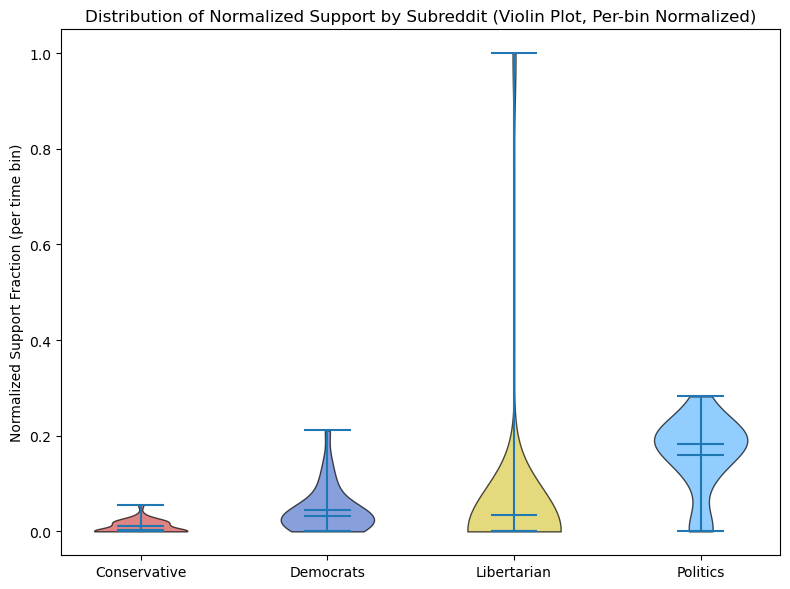

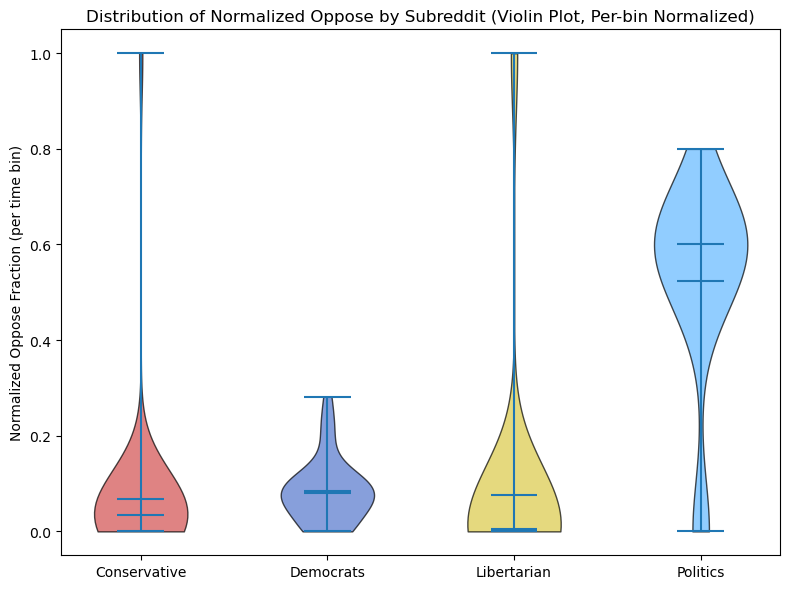

In [51]:
import matplotlib.pyplot as plt

# Each group is already normalized: norm_support[i] is the normalized support fraction per time bin for each subreddit
data = [norm_support[i] for i in range(4)]

fig, ax = plt.subplots(figsize=(8, 6))
parts = ax.violinplot(data, showmeans=True, showmedians=True)

# Set colors for each violin
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(minimal_colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Conservative', 'Democrats', 'Libertarian', 'Politics'])
ax.set_ylabel('Normalized Support Fraction (per time bin)')
ax.set_title('Distribution of Normalized Support by Subreddit (Violin Plot, Per-bin Normalized)')
plt.tight_layout()
plt.show()

# Violin plot for normalized oppose fractions per time bin for each subreddit
oppose_data = [norm_oppose[i] for i in range(4)]

fig, ax = plt.subplots(figsize=(8, 6))
oppose_parts = ax.violinplot(oppose_data, showmeans=True, showmedians=True)

# Set colors for each violin
for i, pc in enumerate(oppose_parts['bodies']):
    pc.set_facecolor(minimal_colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Conservative', 'Democrats', 'Libertarian', 'Politics'])
ax.set_ylabel('Normalized Oppose Fraction (per time bin)')
ax.set_title('Distribution of Normalized Oppose by Subreddit (Violin Plot, Per-bin Normalized)')
plt.tight_layout()
plt.show()

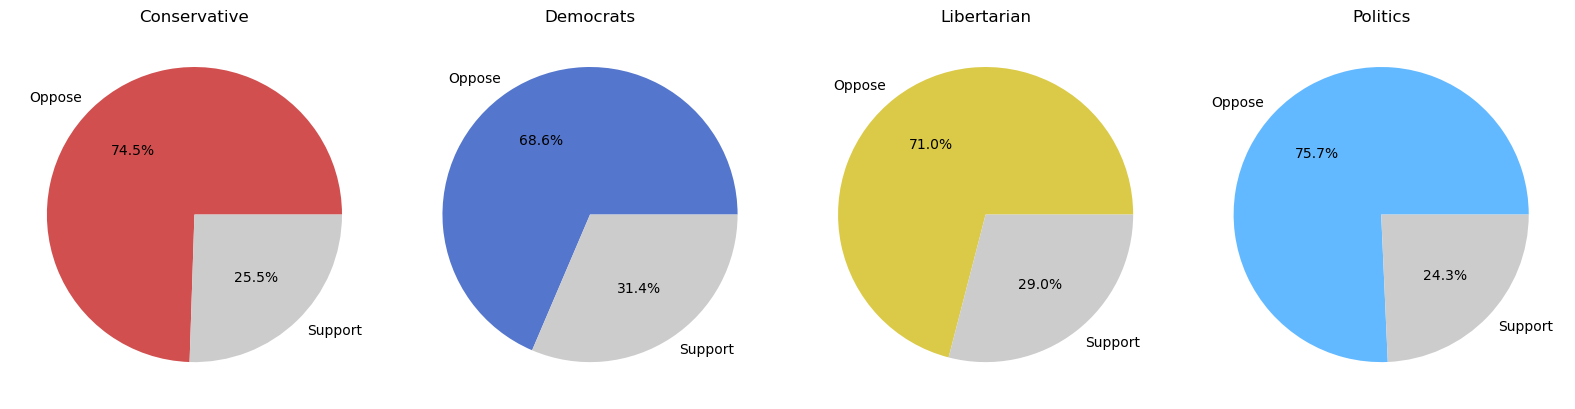

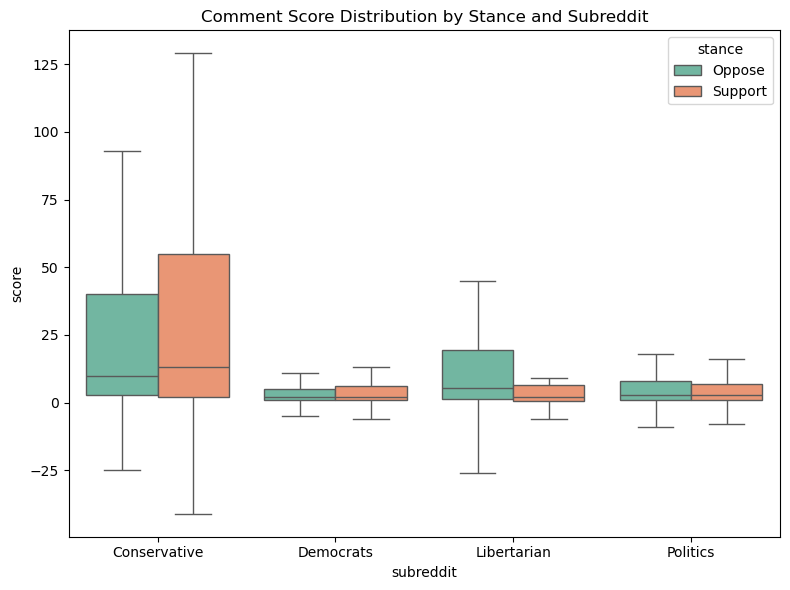

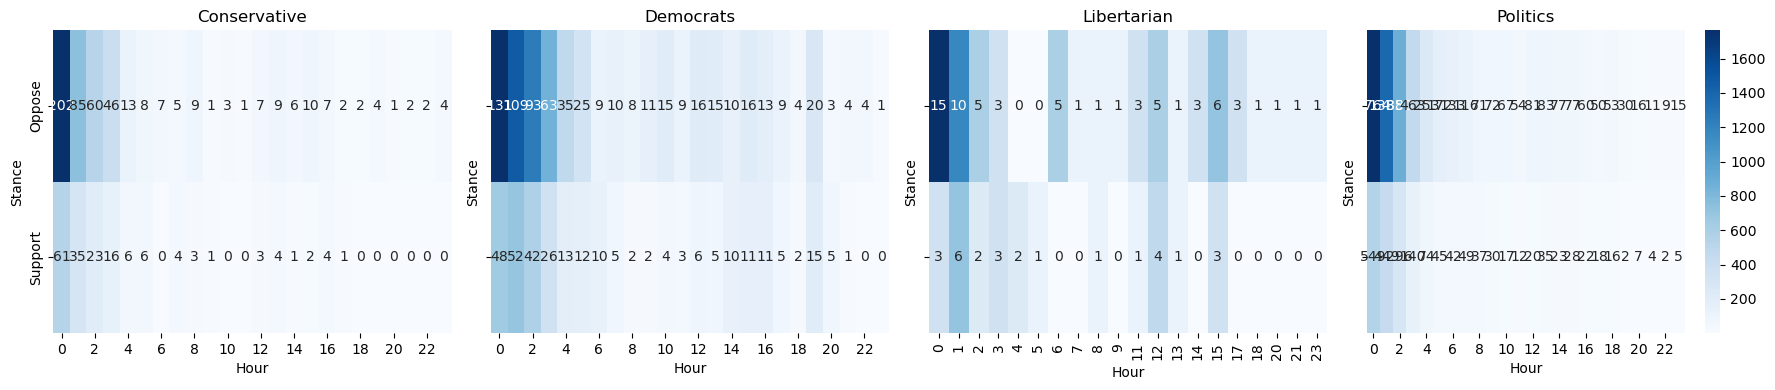

In [53]:
import seaborn as sns

# 1. Pie chart of stance distribution per subreddit
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, (df, name, color) in enumerate(zip(
    [r_conservative, r_democrats, r_libertarian, r_politics],
    ['Conservative', 'Democrats', 'Libertarian', 'Politics'],
    minimal_colors
)):
    counts = df['stance'].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=[color, '#cccccc'])
    axs[i].set_title(name)
plt.tight_layout()
plt.show()

# Normalize the 'score' column within each subreddit for the boxplot
combined['score_norm'] = combined.groupby('subreddit')['score'].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) > 0 else 0
)
# 2. Boxplot of comment scores by stance
fig, ax = plt.subplots(figsize=(8, 6))
combined = pd.concat([
    r_conservative.assign(subreddit='Conservative'),
    r_democrats.assign(subreddit='Democrats'),
    r_libertarian.assign(subreddit='Libertarian'),
    r_politics.assign(subreddit='Politics')
])
sns.boxplot(data=combined, x='subreddit', y='score', hue='stance', palette='Set2', ax=ax, showfliers=False)
ax.set_title('Comment Score Distribution by Stance and Subreddit')
plt.tight_layout()
plt.show()

# 3. Heatmap of stance counts by hour and subreddit
stance_hour = combined.groupby(['subreddit', 'hour', 'stance']).size().unstack(fill_value=0)
fig, axs = plt.subplots(1, 4, figsize=(18, 4), sharey=True)
for i, name in enumerate(['Conservative', 'Democrats', 'Libertarian', 'Politics']):
    sns.heatmap(
        stance_hour.loc[name].T,
        cmap='Blues',
        ax=axs[i],
        cbar=i==3,
        annot=True,
        fmt='d'
    )
    axs[i].set_title(name)
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Stance')
plt.tight_layout()
plt.show()

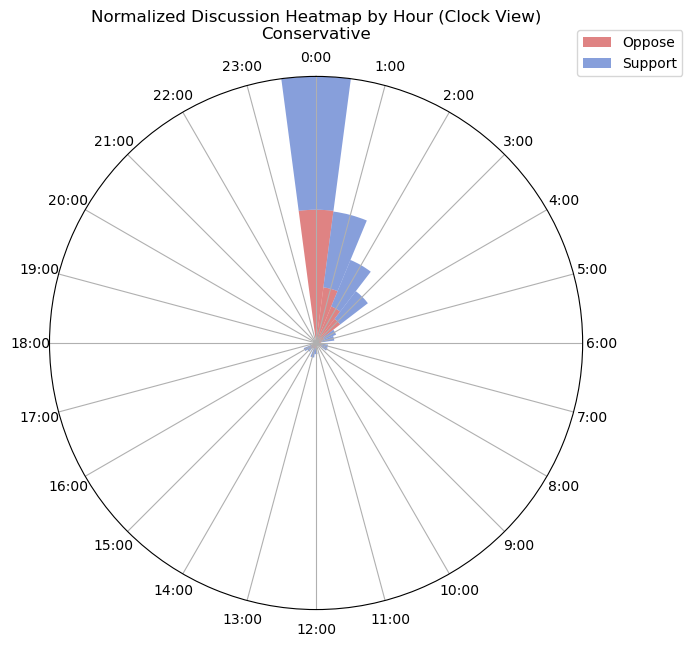

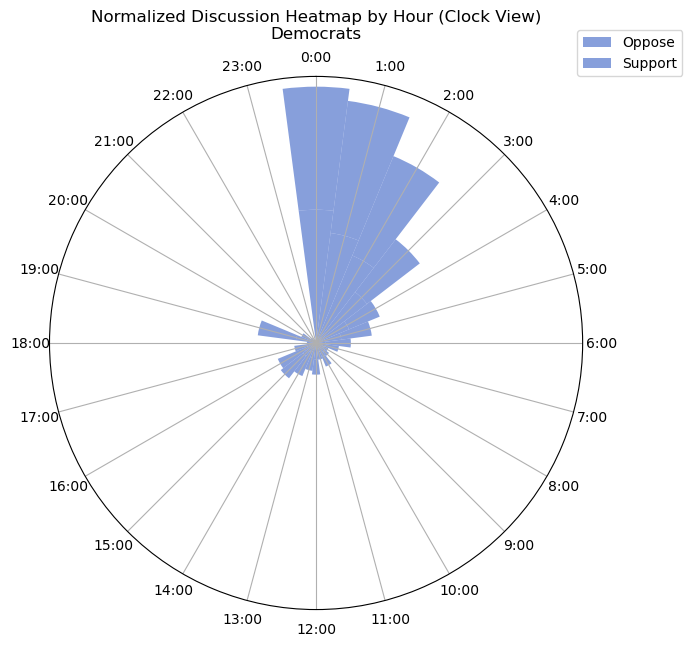

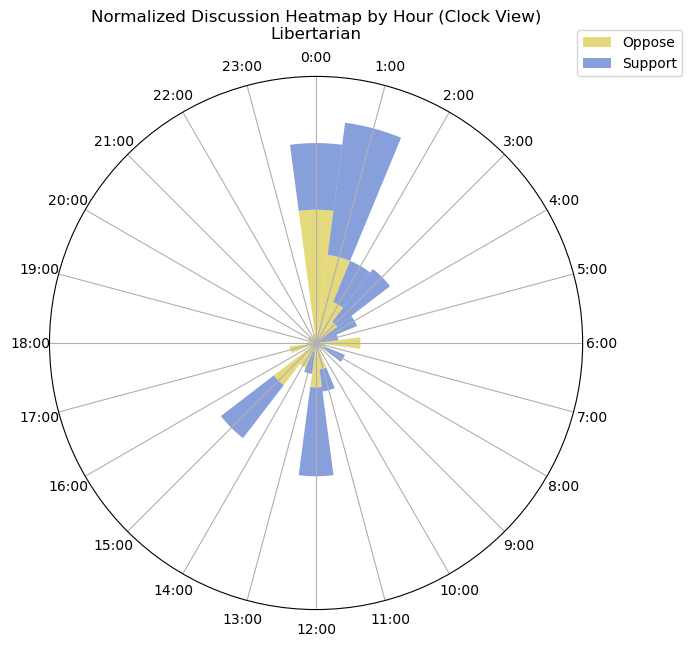

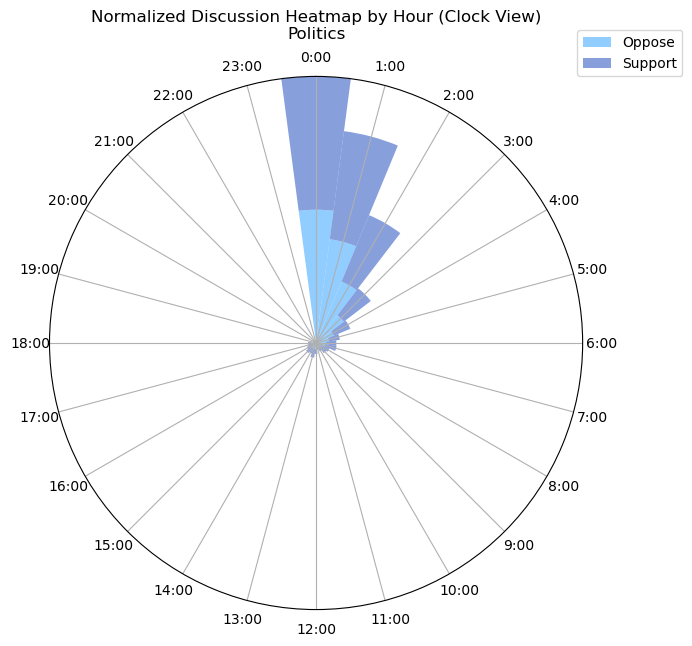

In [112]:
import numpy as np

subreddits = ['Conservative', 'Democrats', 'Libertarian', 'Politics']
hours = list(range(24))
stances = ['Oppose', 'Support']

import matplotlib.pyplot as plt

for sub, color in zip(subreddits, minimal_colors):
    df = eval(f"r_{sub.lower()}")
    counts = df.groupby(['hour', 'stance']).size().unstack(fill_value=0).reindex(hours, fill_value=0)
    norm_counts = counts.div(counts.max())
    theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
    radii_oppose = norm_counts['Oppose'].values
    radii_support = norm_counts['Support'].values

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
    bars_oppose = ax.bar(theta, radii_oppose, width=2*np.pi/24, bottom=0, color=color, alpha=0.7, label='Oppose')
    bars_support = ax.bar(theta, radii_support, width=2*np.pi/24, bottom=radii_oppose, color='#5476CD', alpha=0.7, label='Support')

    # Zoom in: set radial limit to just above the max value
    ax.set_ylim(0, max(radii_oppose.max() + radii_support.max(), 1.05))

    

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
    ax.set_xticklabels([f"{h}:00" for h in hours])
    ax.set_yticks([])
    ax.set_title(f"Normalized Discussion Heatmap by Hour (Clock View)\n{sub}", va='bottom')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()


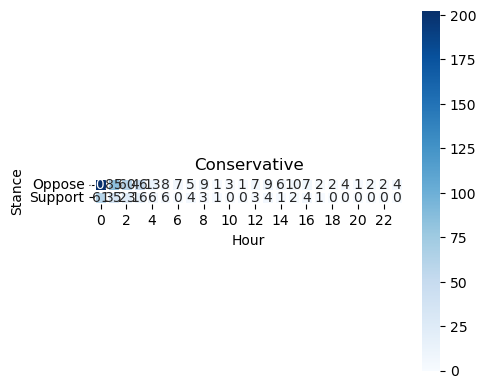

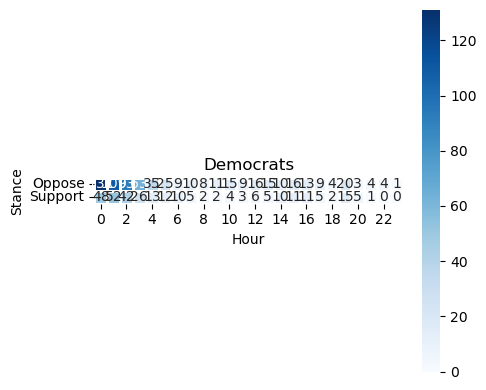

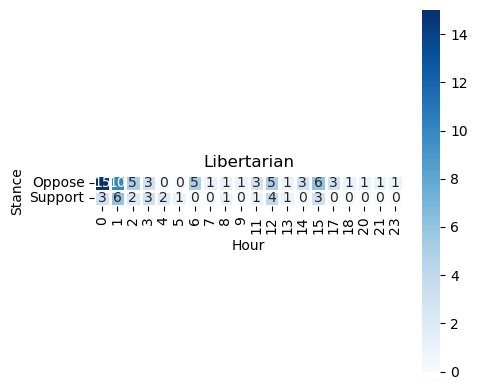

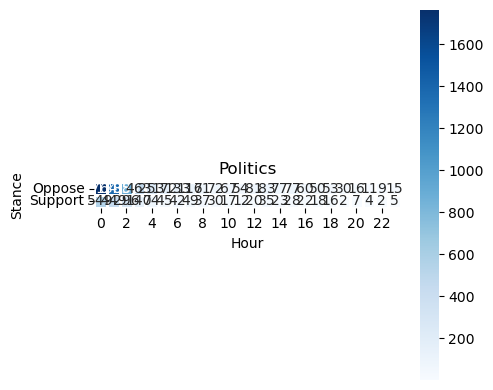

In [57]:
import seaborn as sns
# Increase the size of the squares by increasing figsize and decreasing the number of hours per plot if needed
plt.rcParams['figure.figsize'] = (7, 6)
# Plot individual heatmaps for each subreddit with square, spaced tiles
for i, (df, name, color) in enumerate(zip(
    [r_conservative, r_democrats, r_libertarian, r_politics],
    ['Conservative', 'Democrats', 'Libertarian', 'Politics'],
    minimal_colors
)):
    counts = df.groupby(['hour', 'stance']).size().unstack(fill_value=0)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        counts.T,
        cmap='Blues',
        square=True,
        linewidths=2,  # space between tiles
        linecolor='white',
        cbar=True,
        annot=True,
        fmt='d'
    )
    plt.title(name)
    plt.xlabel('Hour')
    plt.ylabel('Stance')
    plt.tight_layout()
    plt.show()

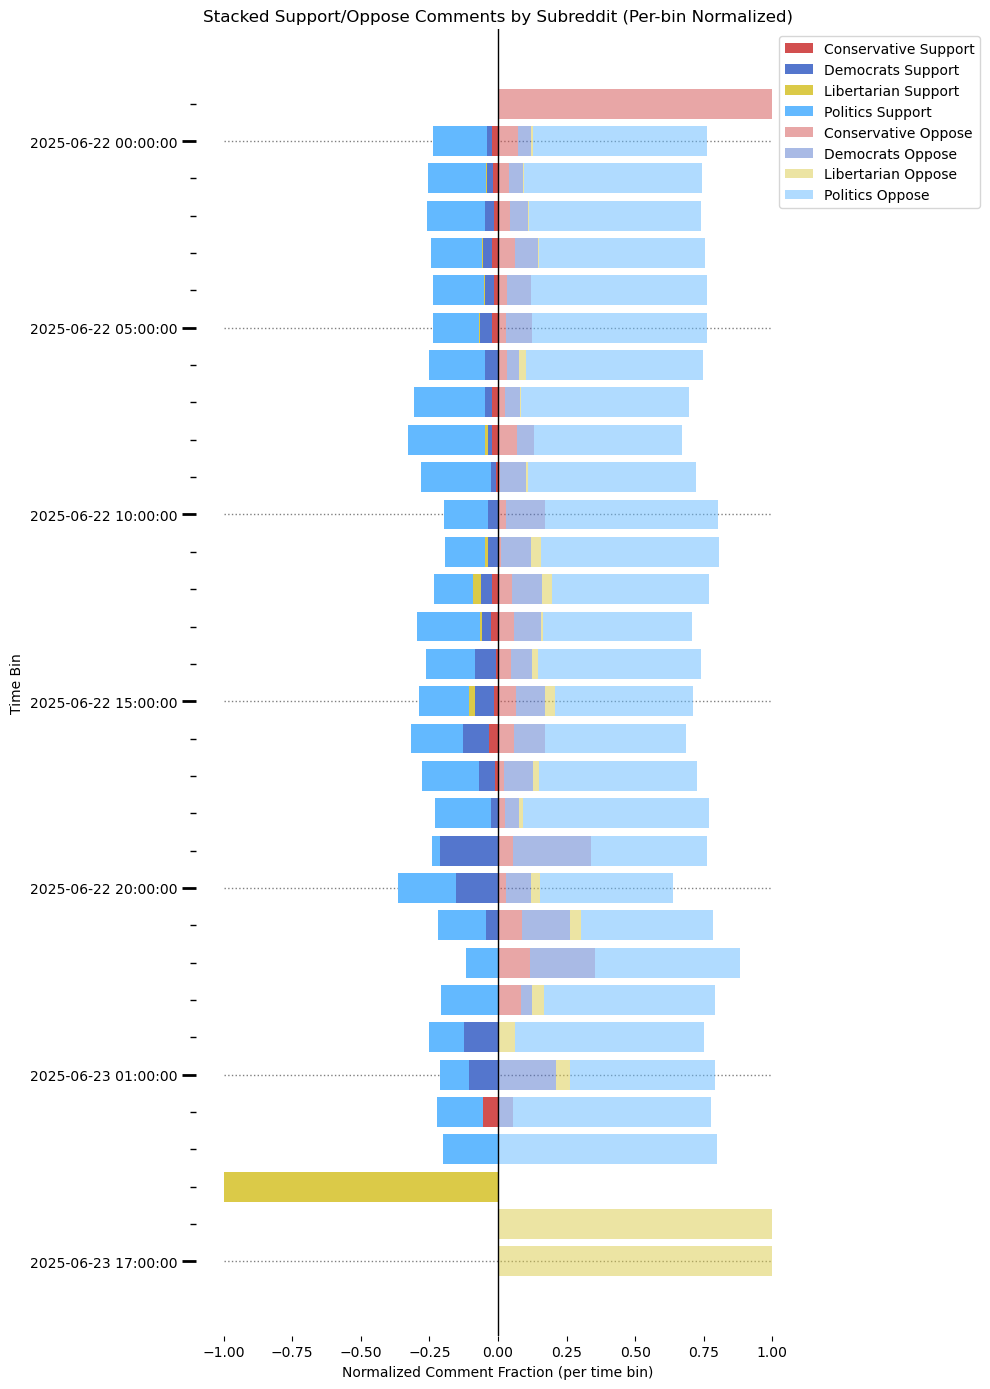

In [119]:
# Calculate net stance per time bin: Oppose = 1, Support = -1, weighted by normalized fractions
# (No moving average line plotted below)

# Calculate net stance per time bin: Oppose = 1, Support = -1, weighted by normalized fractions

fig, ax = plt.subplots(figsize=(10, 14))

# Reverse the order of time_labels and corresponding data so oldest is at the top
rev_time_labels = time_labels[::-1]
rev_support_norm = support_norm[:, ::-1]
rev_oppose_norm = oppose_norm[:, ::-1]

# Plot stacked bars for Support (left of 0, negative direction)
left = np.zeros(len(total_counts))
for i, counts in enumerate(rev_support_norm):
    ax.barh(rev_time_labels, -counts, left=-left, color=minimal_colors[i], height=0.8, label=f"{sub_names[i]} Support")
    left += counts

# Plot stacked bars for Oppose (right of 0, positive direction)
left = np.zeros(len(total_counts))
for i, counts in enumerate(rev_oppose_norm):
    ax.barh(rev_time_labels, counts, left=left, color=minimal_colors[i], height=0.8, alpha=0.5, label=f"{sub_names[i]} Oppose")
    left += counts
ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction (per time bin)")
ax.set_ylabel("Time Bin")
ax.set_title("Stacked Support/Oppose Comments by Subreddit (Per-bin Normalized)")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Set major ticks every 5, minor ticks every 1, with larger size for major ticks and labels only for major
yticks_major = np.arange(0, len(rev_time_labels), 5)
yticks_minor = np.arange(0, len(rev_time_labels), 1)

ax.set_yticks(yticks_major)
ax.set_yticklabels([rev_time_labels[i] for i in yticks_major], fontsize=10)
ax.set_yticks(yticks_minor, minor=True)

# Make major ticks bigger
ax.tick_params(axis='y', which='major', length=10, width=2)
# Make minor ticks smaller and hide their labels
ax.tick_params(axis='y', which='minor', length=4, width=1, labelleft=False)

# Move y-axis to the left of the diagram

ax.spines['left'].set_position(('outward', 20))

for spine in ax.spines.values():
    spine.set_visible(False)

# Draw thin grey dotted lines from major yticks across the plot
# Draw thin grey dotted lines from major yticks across the plot
for y in yticks_major:
    ax.axhline(y, color='grey', linestyle=':', linewidth=1, zorder=0)

plt.tight_layout()
plt.show()


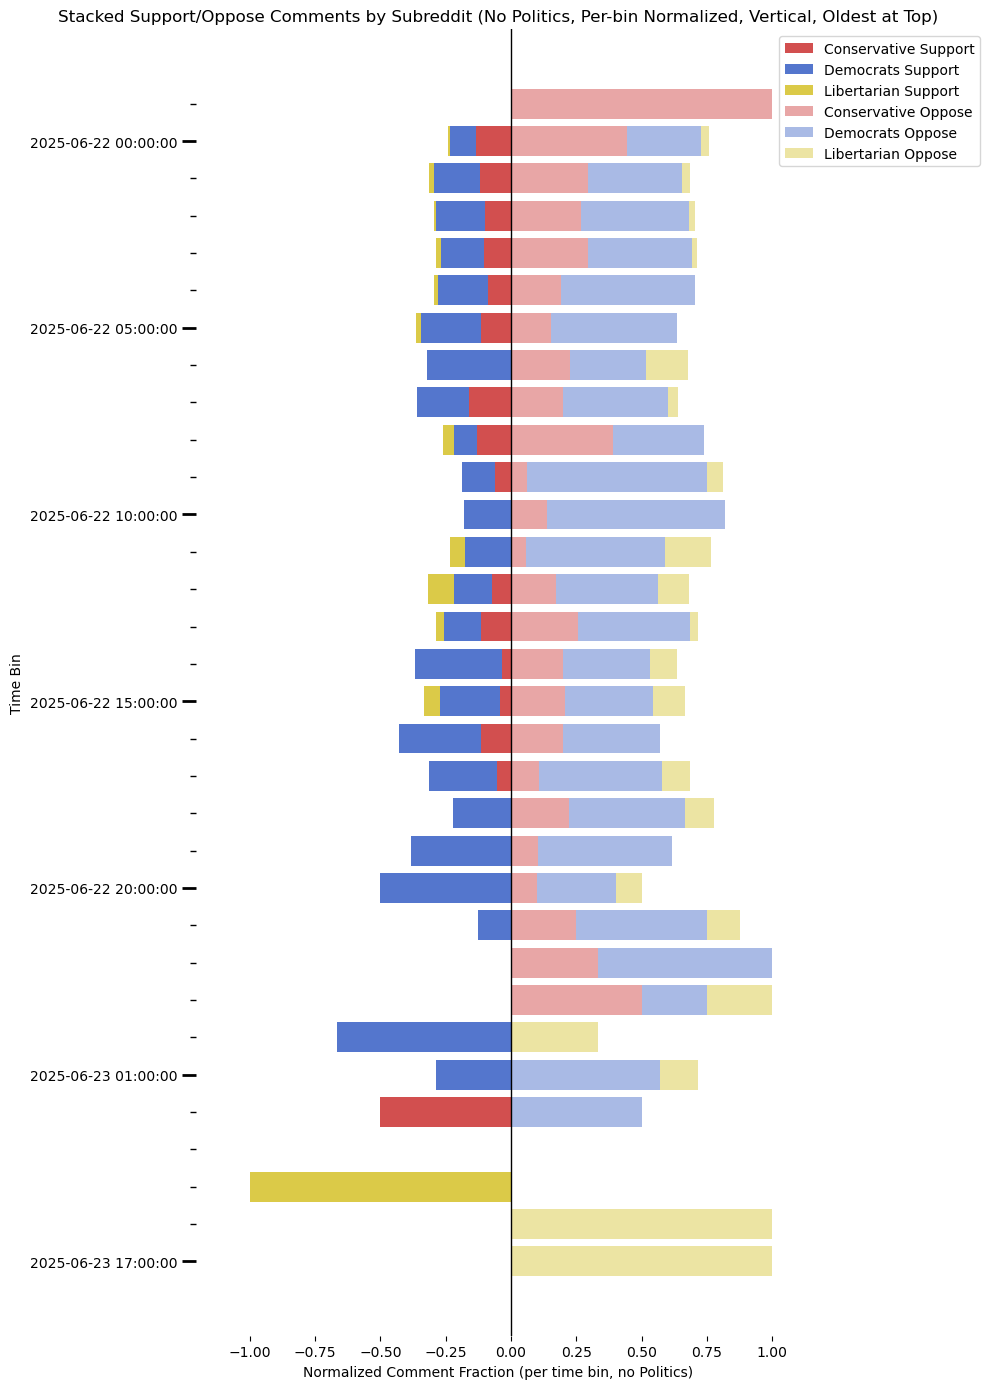

In [94]:
# Plot the renormalized (no politics) stacked support/oppose bars, oldest at top
# Sum across only the three subreddits for each time bin
total_counts_no_pol = (
    ts_con['Support'] + ts_con['Oppose'] +
    ts_dem['Support'] + ts_dem['Oppose'] +
    ts_lib['Support'] + ts_lib['Oppose']
).replace(0, 1)  # avoid division by zero

# Renormalized support and oppose arrays (shape: 3 x time_bins)
support_norm_no_pol = np.vstack([
    ts_con['Support'] / total_counts_no_pol,
    ts_dem['Support'] / total_counts_no_pol,
    ts_lib['Support'] / total_counts_no_pol
])
oppose_norm_no_pol = np.vstack([
    ts_con['Oppose'] / total_counts_no_pol,
    ts_dem['Oppose'] / total_counts_no_pol,
    ts_lib['Oppose'] / total_counts_no_pol
])

# Reverse for plotting oldest at top
rev_support_norm_no_pol = support_norm_no_pol[:, ::-1]
rev_oppose_norm_no_pol = oppose_norm_no_pol[:, ::-1]
fig, ax = plt.subplots(figsize=(10, 14))

# Use only the first 3 subreddits and their colors/names
sub_names_no_pol = ['Conservative', 'Democrats', 'Libertarian']
minimal_colors_no_pol = minimal_colors[:3]

# Plot stacked bars for Support (left of 0, negative direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_support_norm_no_pol):
    ax.barh(rev_time_labels, -counts, left=-left, color=minimal_colors_no_pol[i], height=0.8, label=f"{sub_names_no_pol[i]} Support")
    left += counts

# Plot stacked bars for Oppose (right of 0, positive direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_oppose_norm_no_pol):
    ax.barh(rev_time_labels, counts, left=left, color=minimal_colors_no_pol[i], height=0.8, alpha=0.5, label=f"{sub_names_no_pol[i]} Oppose")
    left += counts

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction (per time bin, no Politics)")
ax.set_ylabel("Time Bin")
ax.set_title("Stacked Support/Oppose Comments by Subreddit (No Politics, Per-bin Normalized, Vertical, Oldest at Top)")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set major ticks every 5, minor ticks every 1, with larger size for major ticks and labels only for major
yticks_major = np.arange(0, len(rev_time_labels), 5)
yticks_minor = np.arange(0, len(rev_time_labels), 1)

ax.set_yticks(yticks_major)
ax.set_yticklabels([rev_time_labels[i] for i in yticks_major], fontsize=10)
ax.set_yticks(yticks_minor, minor=True)

ax.tick_params(axis='y', which='major', length=10, width=2)
ax.tick_params(axis='y', which='minor', length=4, width=1, labelleft=False)

ax.spines['left'].set_position(('outward', 20))
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


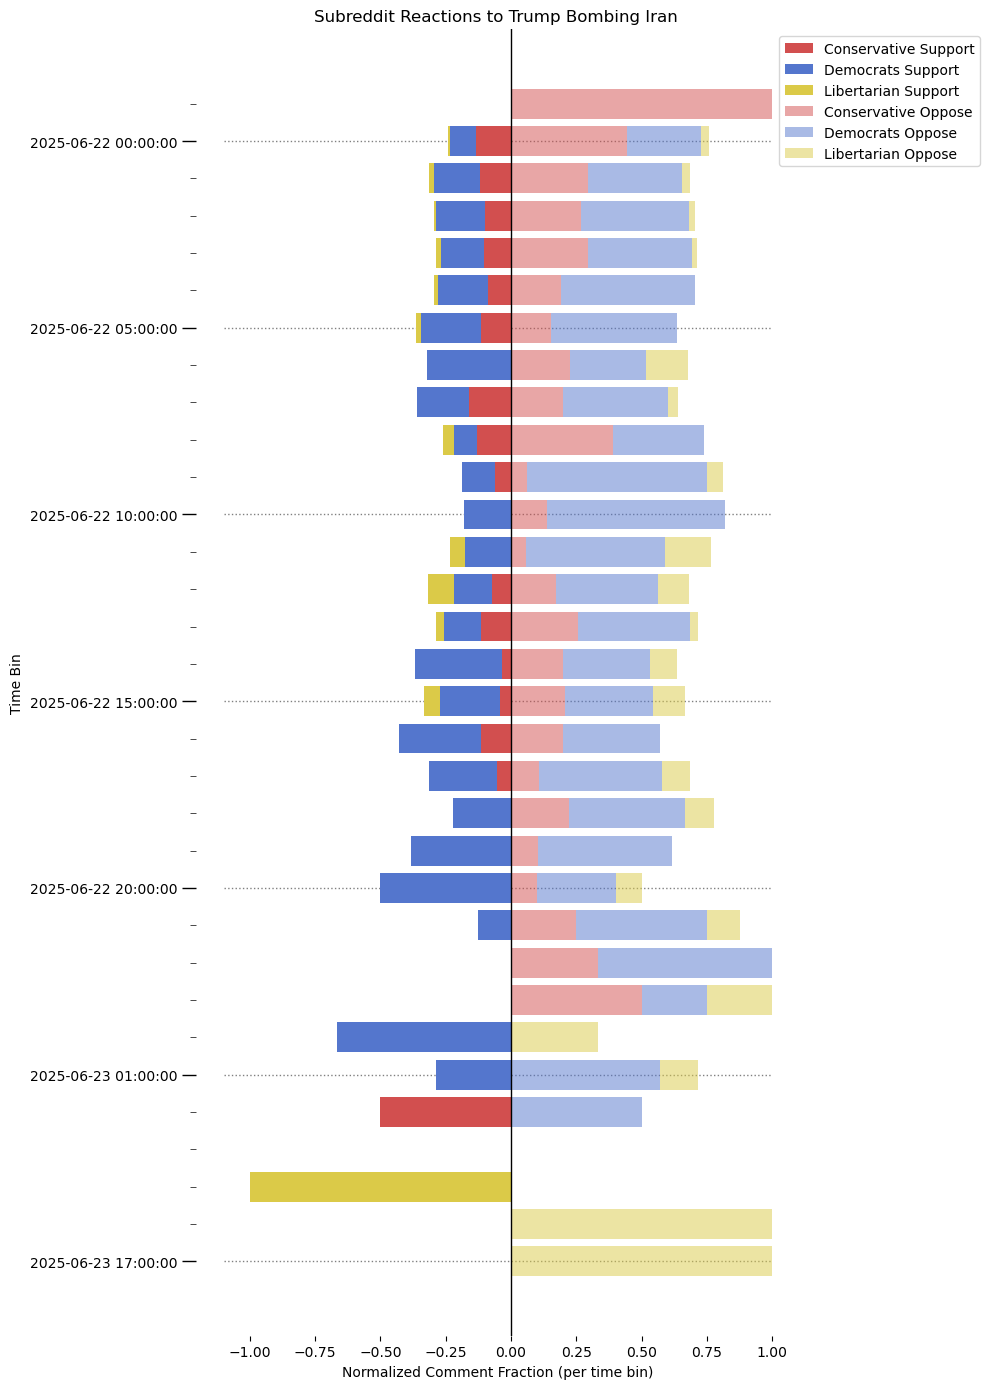

In [122]:
fig, ax = plt.subplots(figsize=(10, 14))

# Plot stacked bars for Support (left of 0, negative direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_support_norm_no_pol):
    ax.barh(rev_time_labels, -counts, left=-left, color=minimal_colors_no_pol[i], 
            height=0.8, label=f"{sub_names_no_pol[i]} Support")
    left += counts

# Plot stacked bars for Oppose (right of 0, positive direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_oppose_norm_no_pol):
    ax.barh(rev_time_labels, counts, left=left, color=minimal_colors_no_pol[i], 
            height=0.8, alpha=0.5, label=f"{sub_names_no_pol[i]} Oppose")
    left += counts

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction (per time bin)")
ax.set_ylabel("Time Bin")
ax.set_title("Subreddit Reactions to Trump Bombing Iran ")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set major ticks every 5, minor ticks every 1, with larger size for major ticks and labels only for major
yticks_major = np.arange(0, len(rev_time_labels), 5)
yticks_minor = np.arange(0, len(rev_time_labels), 1)

ax.set_yticks(yticks_major)
ax.set_yticklabels([rev_time_labels[i] for i in yticks_major], fontsize=10)
ax.set_yticks(yticks_minor, minor=True)

ax.tick_params(axis='y', which='major', length=10, width=1)
ax.tick_params(axis='y', which='minor', length=4, width=0.5, labelleft=False)

ax.spines['left'].set_position(('outward', 20))
for spine in ax.spines.values():
    spine.set_visible(False)

# Draw thin grey dotted lines from major yticks across the plot
for y in yticks_major:
    ax.axhline(y, color='grey', linestyle=':', linewidth=1, zorder=0)

plt.tight_layout()
plt.show()

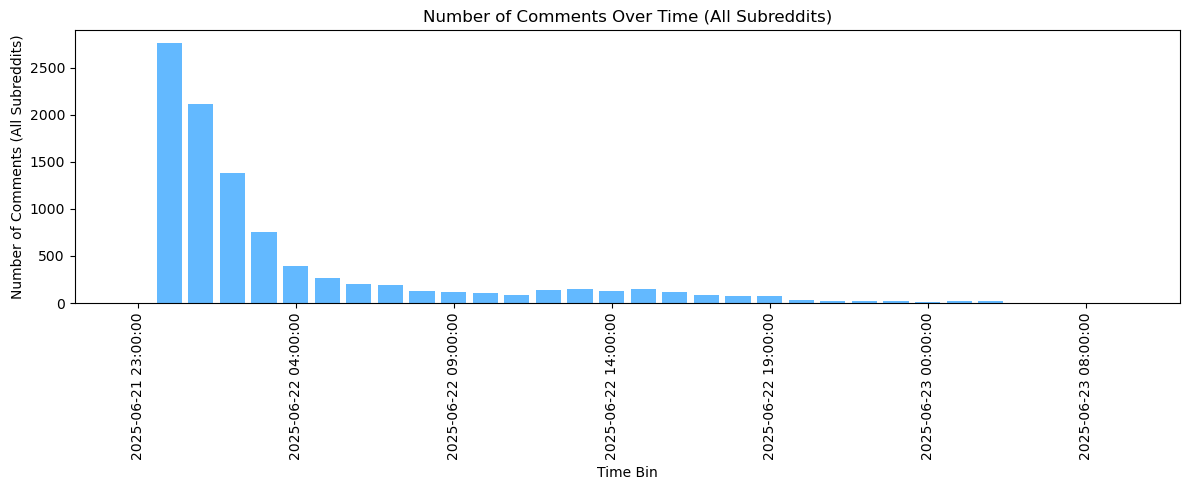

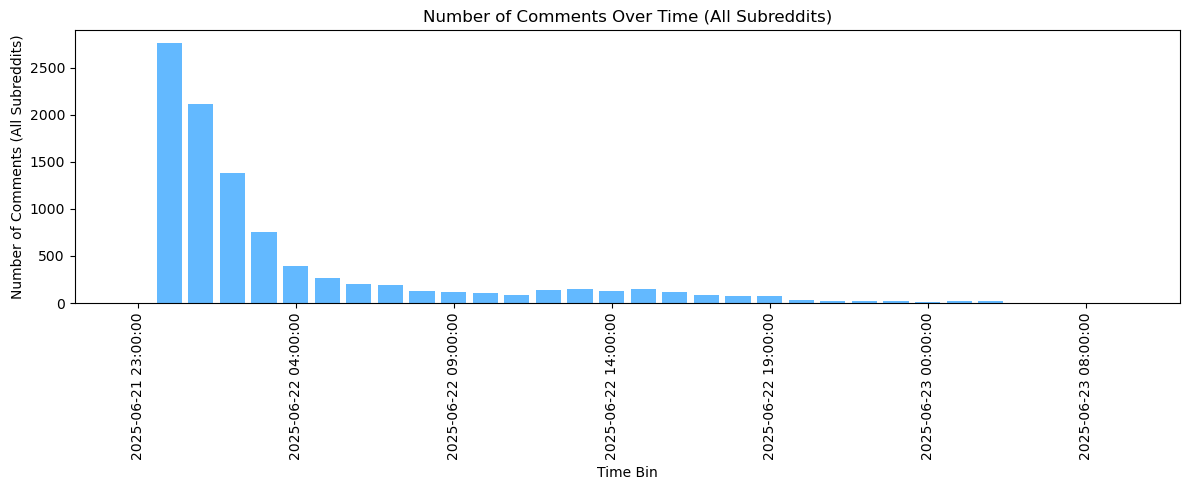

In [130]:
# Histogram of comment counts over time for all subreddits
all_counts = (
    ts_con.sum(axis=1) +
    ts_dem.sum(axis=1) +
    ts_lib.sum(axis=1) +
    ts_pol.sum(axis=1)
)

plt.figure(figsize=(12, 5))
plt.bar(all_counts.index, all_counts.values, color='#63B9FF')
# Set xticks to match yticks_major from the vertical barchart (every 5th time bin, oldest at top)
xticks_major = np.arange(0, len(all_counts.index), 5)
plt.xticks(xticks_major, [all_counts.index[i] for i in xticks_major], rotation=90, fontsize=10)
plt.xlabel('Time Bin')
plt.ylabel('Number of Comments (All Subreddits)')
plt.title('Number of Comments Over Time (All Subreddits)')
plt.tight_layout()
plt.show()
# Only label x-ticks starting from the first non-empty bin
nonzero_idx = np.argmax(all_counts.values > 0)
xticks_major_nonzero = xticks_major[xticks_major >= nonzero_idx]
plt.figure(figsize=(12, 5))
plt.bar(all_counts.index, all_counts.values, color='#63B9FF')
plt.xticks(xticks_major_nonzero, [all_counts.index[i] for i in xticks_major_nonzero], rotation=90, fontsize=10)
plt.xlabel('Time Bin')
plt.ylabel('Number of Comments (All Subreddits)')
plt.title('Number of Comments Over Time (All Subreddits)')
plt.tight_layout()
plt.show()

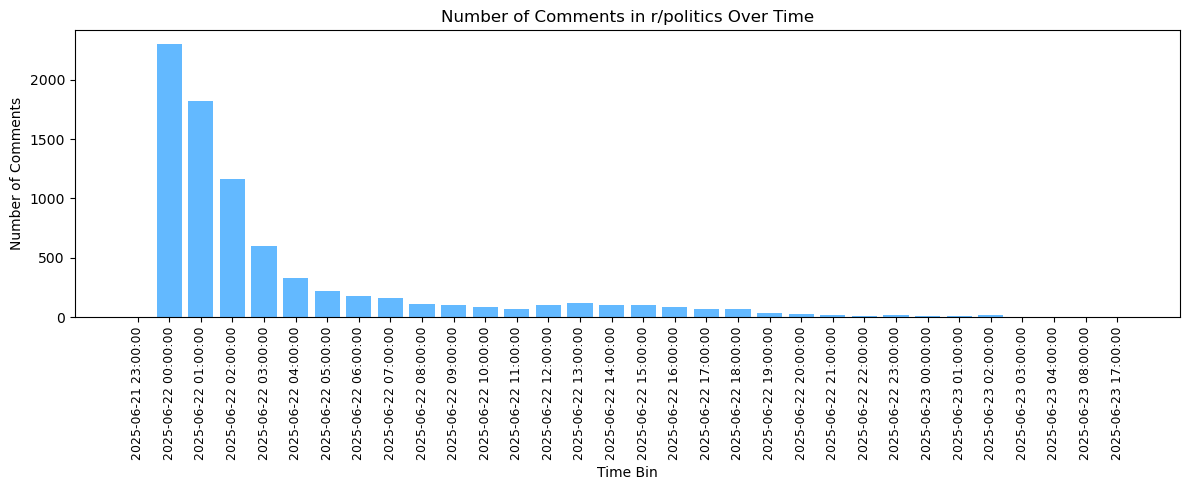

In [128]:
plt.figure(figsize=(12, 5))
plt.bar(ts.index, ts.sum(axis=1), color='#63B9FF')
plt.xticks(rotation=90, fontsize=9)
plt.xlabel('Time Bin')
plt.ylabel('Number of Comments')
plt.title('Number of Comments in r/politics Over Time')
plt.tight_layout()
plt.show()

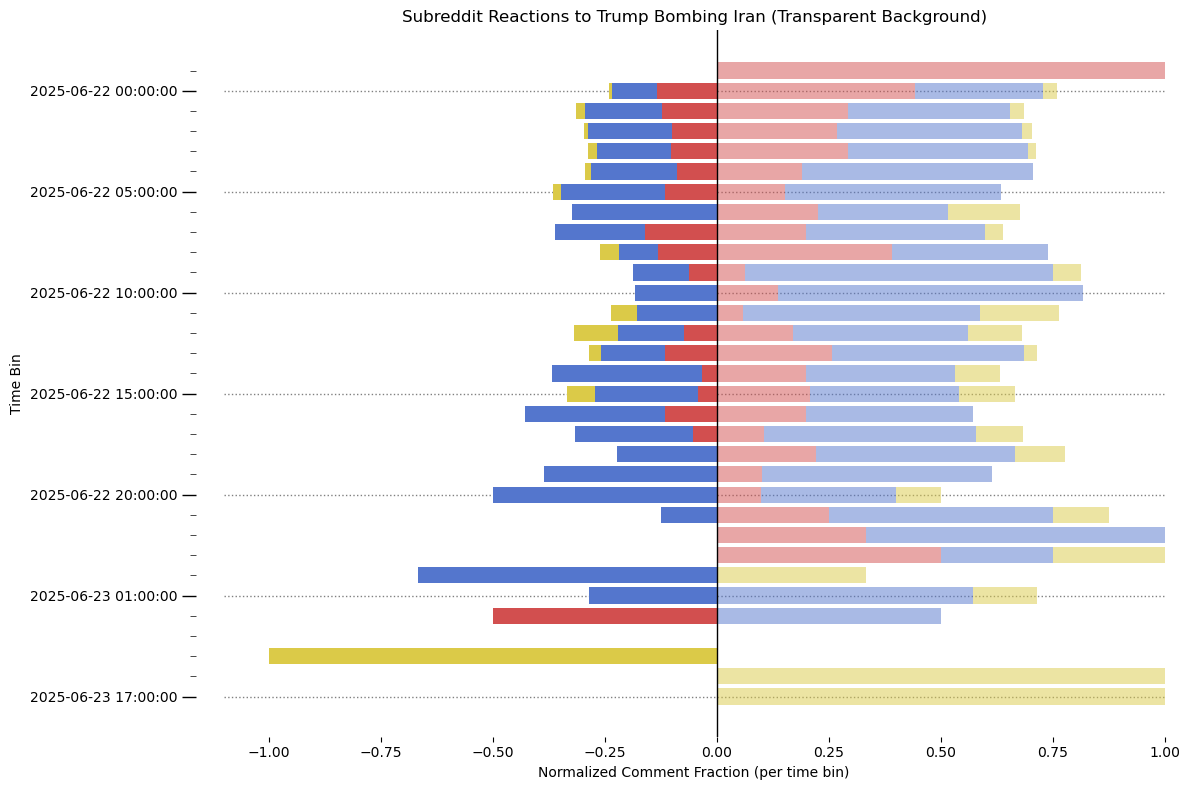

In [153]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor='none')

# Plot stacked bars for Support (left of 0, negative direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_support_norm_no_pol):
    ax.barh(rev_time_labels, -counts, left=-left, color=minimal_colors_no_pol[i], 
            height=0.8, label=f"{sub_names_no_pol[i]} Support")
    left += counts
    ax.set_facecolor('none')

# Plot stacked bars for Oppose (right of 0, positive direction)
left = np.zeros(len(rev_time_labels))
for i, counts in enumerate(rev_oppose_norm_no_pol):
    ax.barh(rev_time_labels, counts, left=left, color=minimal_colors_no_pol[i], 
            height=0.8, alpha=0.5)
    left += counts
    ax.set_facecolor('none')

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("Normalized Comment Fraction (per time bin)")
ax.set_ylabel("Time Bin")
ax.set_title("Subreddit Reactions to Trump Bombing Iran (Transparent Background)")


# Set major ticks every 5, minor ticks every 1, with larger size for major ticks and labels only for major
yticks_major = np.arange(0, len(rev_time_labels), 5)
yticks_minor = np.arange(0, len(rev_time_labels), 1)

ax.set_yticks(yticks_major)
ax.set_yticklabels([rev_time_labels[i] for i in yticks_major], fontsize=10)
ax.set_yticks(yticks_minor, minor=True)

ax.tick_params(axis='y', which='major', length=10, width=1)
ax.tick_params(axis='y', which='minor', length=4, width=0.5, labelleft=False)

ax.spines['left'].set_position(('outward', 20))
for spine in ax.spines.values():
    spine.set_visible(False)

# Draw thin grey dotted lines from major yticks across the plot
for y in yticks_major:
    ax.axhline(y, color='grey', linestyle=':', linewidth=1, zorder=0)

ax.set_facecolor('none')
plt.tight_layout()
plt.show()

# Save the figure with a transparent background to ensure no white fill
fig.savefig("subreddit_reactions_transparent.png", dpi=300, bbox_inches='tight', transparent=True)

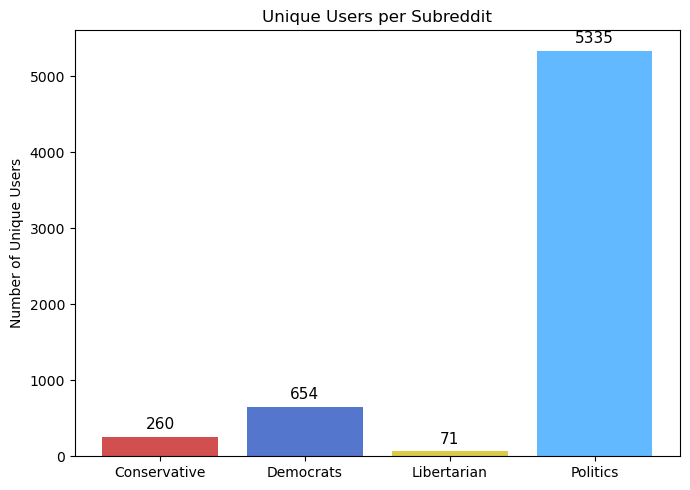

In [154]:
# Count unique users per subreddit
user_counts = {
    'Conservative': r_conservative['author'].nunique(),
    'Democrats': r_democrats['author'].nunique(),
    'Libertarian': r_libertarian['author'].nunique(),
    'Politics': r_politics['author'].nunique()
}

# Bar plot of user counts per subreddit
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(user_counts.keys(), user_counts.values(), color=minimal_colors)
ax.set_ylabel('Number of Unique Users')
ax.set_title('Unique Users per Subreddit')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

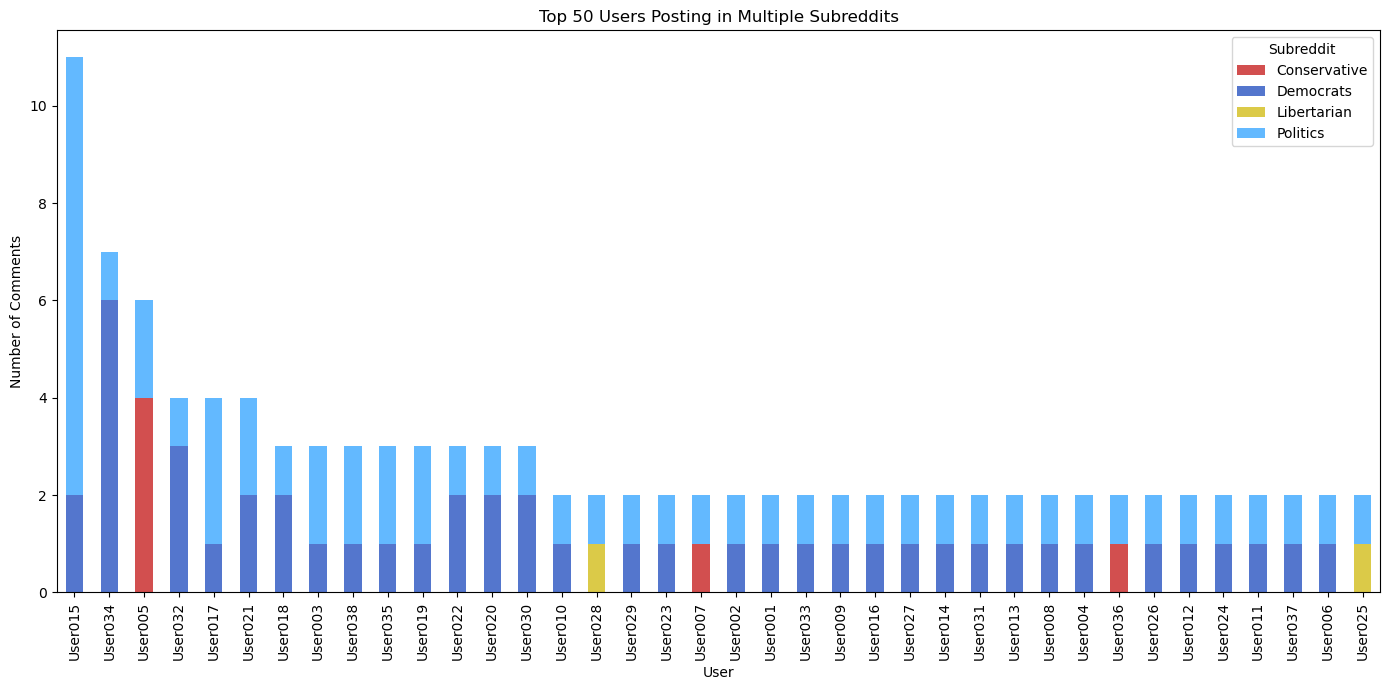

Legend labels: ['Conservative', 'Democrats', 'Libertarian', 'Politics']
Legend colors: ['#D24F4F', '#5476CD', '#DBCA48', '#63B9FF']
Column order in plot_df: ['Conservative', 'Democrats', 'Libertarian', 'Politics']
Legend color order correct: True


In [189]:
from collections import Counter

# Remove deleted comments (authors '[deleted]' or '[removed]')
def is_valid_author(author):
    return author not in ['[deleted]', '[removed]', 'deleted', 'removed', '{deleted}', '{removed}']

# All subreddit DataFrames and names
subreddit_dfs_clean = []
for name, df in subreddit_dfs:
    clean_df = df[df['author'].apply(is_valid_author)].copy()
    subreddit_dfs_clean.append((name, clean_df))

# Find users who posted in more than one subreddit
all_authors = pd.concat([df[['author']].assign(subreddit=name) for name, df in subreddit_dfs_clean])
author_sub_counts = all_authors.groupby('author')['subreddit'].nunique()
multi_sub_authors = author_sub_counts[author_sub_counts > 1].index

# Anonymize usernames: map to User001, User002, ...
anon_map = {user: f"User{str(i+1).zfill(3)}" for i, user in enumerate(multi_sub_authors)}

# For these users, count their posts per subreddit
multi_sub_posts = []
for name, df in subreddit_dfs_clean:
    counts = df[df['author'].isin(multi_sub_authors)]['author'].value_counts()
    counts.index = counts.index.map(anon_map)
    multi_sub_posts.append(counts.rename(name))

multi_sub_posts_df = pd.concat(multi_sub_posts, axis=1).fillna(0).astype(int)
multi_sub_posts_df['Total'] = multi_sub_posts_df.sum(axis=1)
multi_sub_posts_df = multi_sub_posts_df.sort_values('Total', ascending=False)

# Only show top N users for clarity
top_n = 50
plot_df = multi_sub_posts_df.head(top_n)
minimal_colors = ["#D24F4F", "#5476CD", "#DBCA48", "#63B9FF"]
# Plot as stacked bar chart
ax = plot_df[sub_names].plot(kind='bar', stacked=True, figsize=(14, 7), color=minimal_colors)
plt.ylabel('Number of Comments')
plt.xlabel('User')
plt.title(f'Top {top_n} Users Posting in Multiple Subreddits')
plt.legend(title='Subreddit')
plt.tight_layout()
plt.show()


# Check if the legend colors are in the proper order (matching sub_names and minimal_colors)
legend_labels = sub_names
legend_colors = minimal_colors

# The plot_df columns used for stacking are sub_names, and the color order is minimal_colors,
# so the legend colors should match the order of sub_names.
print("Legend labels:", legend_labels)
print("Legend colors:", legend_colors)
print("Column order in plot_df:", list(plot_df.columns[:-1]))  # Exclude 'Total' column

# Check if the order matches
is_order_correct = list(plot_df.columns[:-1]) == legend_labels and legend_colors == minimal_colors
print("Legend color order correct:", is_order_correct)

In [169]:
# For users who posted in multiple subreddits, show their top scoring comment from each subreddit

# multi_sub_authors and anon_map are already defined in previous cells
# subreddit_dfs_clean is a list of (name, df) for each subreddit with valid authors

top_comments_multi = []

for name, df in subreddit_dfs_clean:
    # Only consider users who posted in multiple subreddits
    df_multi = df[df['author'].isin(multi_sub_authors)].copy()
    # For each user, get their top scoring comment in this subreddit
    idx = df_multi.groupby('author')['score'].idxmax()
    top_df = df_multi.loc[idx].copy()
    # Anonymize usernames
    top_df['anon_user'] = top_df['author'].map(anon_map)
    top_df['subreddit'] = name
    # Keep relevant columns including stance and stance_topic
    top_comments_multi.append(
        top_df[['anon_user', 'subreddit', 'score', 'stance', 'stance_topic', 'body', 'permalink']]
    )

# Concatenate results
top_comments_multi_df = pd.concat(top_comments_multi, ignore_index=True)

# Show the top scoring comment for each user in each subreddit
display(top_comments_multi_df.sort_values(['anon_user', 'subreddit']))



,anon_user,subreddit,score,stance,stance_topic,body,permalink
3,User001,Democrats,9,Support,Oppose,He's definitely not getting that Noble Peace p...,/r/democrats/comments/1lhaml6/we_are_at_war/mz...
38,User001,Politics,20,Support,Oppose,He's definitely not getting that Noble Peace p...,/r/politics/comments/1lhaiqa/megathread_us_pre...
4,User002,Democrats,9,Oppose,Oppose,"So it wasn't ""no new wars"" as the reason the c...",/r/democrats/comments/1lhaml6/we_are_at_war/mz...
39,User002,Politics,74,Support,Support,"According to MAGA, if you're against this, the...",/r/politics/comments/1lhaiqa/megathread_us_pre...
5,User003,Democrats,22,Oppose,Oppose,Didn’t he just rant about why he deserves a no...,/r/democrats/comments/1lhaml6/we_are_at_war/mz...
...,...,...,...,...,...,...,...
73,User036,Politics,-23,Oppose,Oppose,Democrat here giving this a major thumbs up,/r/politics/comments/1lhaiqa/megathread_us_pre...
34,User037,Democrats,17,Support,Support,Instead they would vote on authorizations of m...,/r/democrats/comments/1lhaml6/we_are_at_war/mz...
74,User037,Politics,-3,Oppose,Oppose,Nah the media is all in on the group texts. Th...,/r/politics/comments/1lhaiqa/megathread_us_pre...
35,User038,Democrats,2,Support,Oppose,"1. Mass deportations \n2. Tariffs\nEdit: oh, y...",/r/democrats/comments/1lhaml6/we_are_at_war/mz...


In [193]:
# Filter top_comments_multi_df for User015 and print their comments
user_15_comments = top_comments_multi_df[top_comments_multi_df['anon_user'] == 'User015']
print(user_15_comments['body'].to_string(index=False))  

                        Impeach and remove
Impeach and remove Trump and Vance. Today.


In [171]:
# Count multi-sub users who have at least one 'Support' in both 'stance' and 'stance_topic' columns

# multi_sub_authors and anon_map are already defined
# subreddit_dfs_clean is a list of (name, df) for each subreddit with valid authors

# Concatenate all cleaned DataFrames for multi-sub users
multi_sub_df = pd.concat([
    df[df['author'].isin(multi_sub_authors)].assign(subreddit=name)
    for name, df in subreddit_dfs_clean
])

# Group by user, check if they have at least one 'Support' in both columns
def has_support(group):
    return (group['stance'] == 'Support').any() or (group['stance_topic'] == 'Support').any()

multi_support_users = multi_sub_df.groupby('author').filter(has_support)['author'].unique()
num_multi_support = len(multi_support_users)
print("Number of multi-sub users that support in both columns:", num_multi_support)

Number of multi-sub users that support in both columns: 18


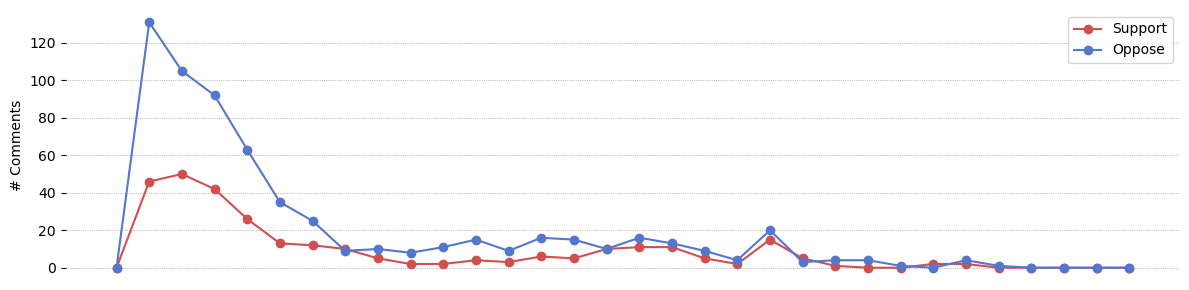

In [183]:
fig, ax = plt.subplots(figsize=(12, 3), facecolor='none')
ax.plot(ts_dem.index, ts_dem['Support'], label='Support', color='#D24F4F', marker='o')
ax.plot(ts_dem.index, ts_dem['Oppose'], label='Oppose', color='#5476CD', marker='o')

ax.set_ylabel('# Comments')
ax.legend()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle=':', linewidth=0.5, color='grey')
ax.set_facecolor('none')    
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xticks([])
plt.tight_layout()
plt.show()

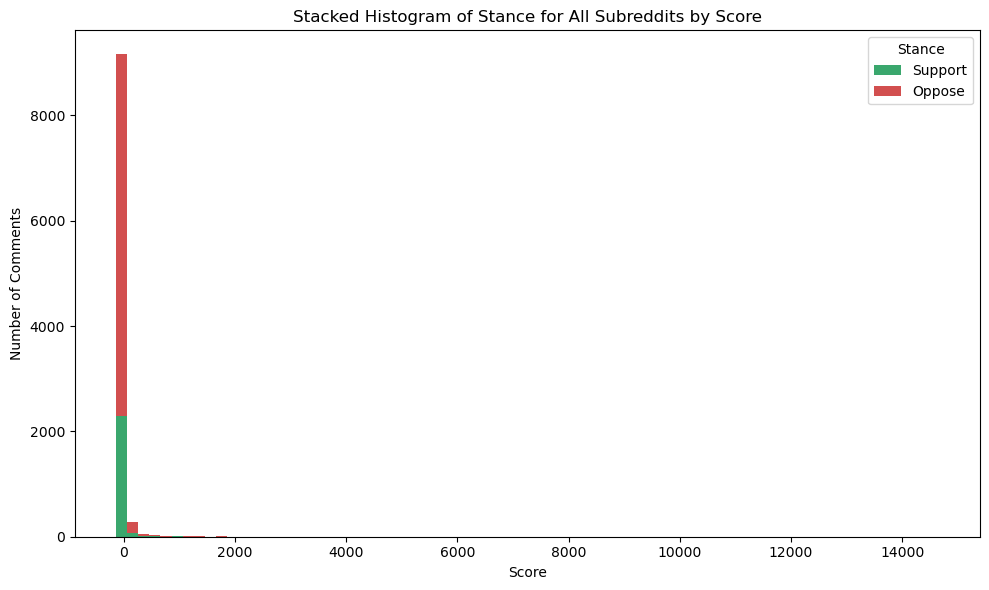

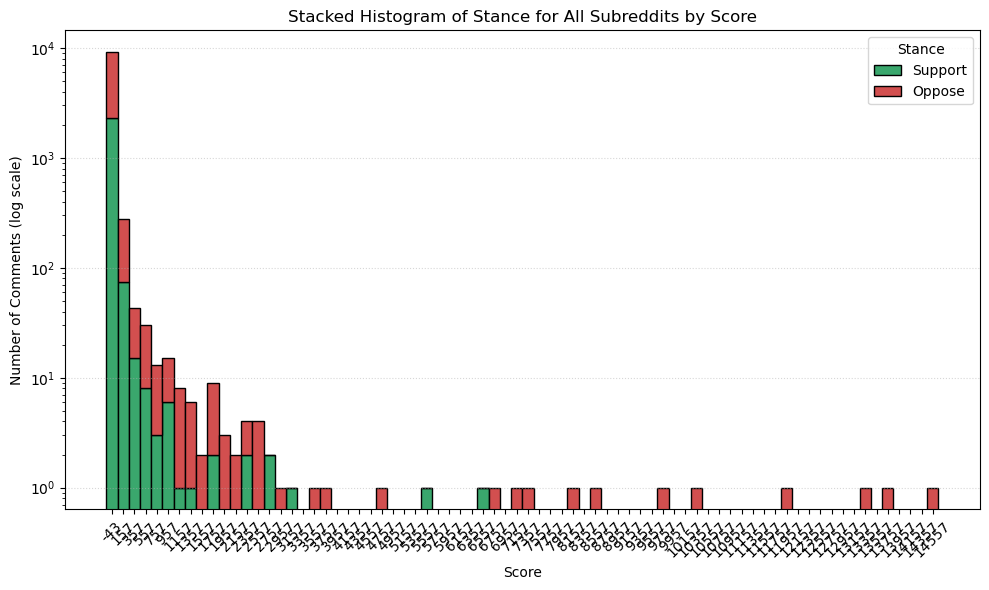

In [203]:
# Prepare data for stacked histogram of stance for all subreddits using score as the bin
# Use r_conservative, r_democrats, r_libertarian, r_politics and their 'score' and 'stance' columns

# Combine all subreddits into one DataFrame
all_df = pd.concat([
    r_conservative.assign(subreddit='Conservative'),
    r_democrats.assign(subreddit='Democrats'),
    r_libertarian.assign(subreddit='Libertarian'),
    r_politics.assign(subreddit='Politics')
])

# Define score bins (use quantiles or fixed width, here use fixed width for clarity)
bin_width = 200
min_score = all_df['score'].min()
max_score = all_df['score'].max()
bins = np.arange(min_score, max_score + bin_width, bin_width)

# Prepare data for each stance
stances = ['Support', 'Oppose']
hist_data = [all_df[all_df['stance'] == stance]['score'] for stance in stances]

# Plot stacked histogram
plt.figure(figsize=(10, 6))
plt.hist(hist_data, bins=bins, stacked=True, label=stances, color=['#3aa76d', '#D24F4F'])
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('Stacked Histogram of Stance for All Subreddits by Score')
plt.legend(title='Stance')
plt.tight_layout()
plt.show()

# Improved: Use log scale for y-axis, center bins at tick labels, and add grid for readability
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    hist_data,
    bins=bins,
    stacked=True,
    label=stances,
    color=['#3aa76d', '#D24F4F'],
    edgecolor='black'
)
plt.xlabel('Score')
plt.ylabel('Number of Comments (log scale)')
plt.yscale('log')
plt.title('Stacked Histogram of Stance for All Subreddits by Score')
plt.legend(title='Stance')
plt.grid(axis='y', linestyle=':', alpha=0.5)
# Center x-ticks at bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, [f"{int(b)}" for b in bin_centers], rotation=45)
plt.tight_layout()
plt.show()